<a href="https://colab.research.google.com/github/RaghdIt/DataScience/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# قائمة الأسهم السعودية
tickers = [
    "2222.SR",  # Saudi Aramco (Flag pattern)
    "1120.SR",  # Al Rajhi Bank (Pennant pattern)
    "2010.SR",  # SABIC (Cup with Handle pattern)
    "7010.SR",  # Saudi Telecom Company (Ascending Triangle pattern)
    "1180.SR",  # Saudi National Bank (Symmetrical Triangle pattern)
    "4250.SR",  # Jabal Omar Development Company (Measured Move Up pattern)
    "1150.SR",  # Alinma Bank (Ascending Scallop pattern)
    "1211.SR",  # Ma'aden (3 Rising Valleys pattern)
    "2350.SR",  # Saudi Kayan Petrochemical Company (Bearish Flag pattern)
    "4300.SR",  # Dar Al Arkan Real Estate (Bearish Pennant pattern)
    "8120.SR",  # Gulf Union Insurance (Inverted Cup with Handle pattern)
    "7020.SR",  # Etihad Etisalat (Descending Triangle pattern)
    "4220.SR",  # Emaar The Economic City (Symmetrical Triangle Bearish resolution pattern)
    "2040.SR",  # Saudi Ceramic Company (Measured Move Down pattern)
    "4030.SR",  # National Shipping Company of Saudi Arabia (Descending Scallop pattern)
    "2300.SR",  # Saudi Paper Manufacturing Company (3 Descending Peaks pattern)
    "6004.SR",  # Saudi Airlines Catering Company (Double Bottom pattern)
    "1810.SR",  # Al-Tayyar Travel Group (Diamond Bottom pattern)
    "1140.SR",  # Bank Albilad (Top Rectangle pattern)
    "2050.SR"   # Savola Group (Head and Shoulders Top pattern)
]

# إنشاء DataFrame لتخزين بيانات جميع الأسهم
all_stocks_data = pd.DataFrame()

# دالة حساب RSI
def calculate_rsi(data, window=14):
    delta = data["Close"].diff()  # حساب التغير بين يوم وآخر
    gain = np.where(delta > 0, delta, 0)  # المكاسب (القيم الإيجابية)
    loss = np.where(delta < 0, -delta, 0)  # الخسائر (القيم السلبية)

    # حساب المتوسط المتحرك للمكاسب والخسائر
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=window).mean()

    # التعامل مع القسمة على صفر بإضافة قيمة صغيرة
    rs = avg_gain / (avg_loss + 1e-10)  # إضافة قيمة صغيرة لتجنب القسمة على صفر
    rsi = 100 - (100 / (1 + rs))  # حساب RSI

    return rsi

# جلب البيانات لكل سهم وإضافتها إلى DataFrame
for ticker in tickers:
    stock = yf.Ticker(ticker)

    # جلب البيانات التاريخية
    data = stock.history(start="2023-08-01", end="2024-03-01")

    if data.empty:
        print(f"⚠ لا توجد بيانات متاحة للسهم {ticker}")
        continue  # تخطي هذا السهم إذا لم تكن هناك بيانات

    # حساب نسبة التغير في السعر اليومي
    data["Price Change %"] = ((data["Close"] - data["Open"]) / data["Open"]) * 100

    # حساب المتوسطات المتحركة
    data["MA50"] = data["Close"].rolling(window=50, min_periods=1).mean()
    data["MA200"] = data["Close"].rolling(window=200, min_periods=1).mean()

    # حساب RSI
    data["RSI"] = calculate_rsi(data, window=14)

    # إذا كانت القيم فارغة، تعيينها كـ 0
    data["RSI"].fillna(0, inplace=True)

    # حساب متوسط حجم التداول خلال آخر 50 يومًا
    data["Avg Volume"] = data["Volume"].rolling(window=50, min_periods=1).mean()
    data["Volume vs Avg Volume"] = data["Volume"] / data["Avg Volume"]

    # الاحتفاظ بالأعمدة المطلوبة
    data = data[["Open", "Close", "High", "Low", "Volume", "Avg Volume", "Volume vs Avg Volume",
                 "Price Change %", "MA50", "MA200", "RSI"]]
    data["Stock"] = ticker  # إضافة اسم السهم

    # جلب البيانات المالية العامة
    pe_ratio = stock.info.get("trailingPE", "N/A")
    dividend_yield = stock.info.get("dividendYield", "N/A")

    # إضافة البيانات المالية إلى DataFrame
    data["P/E Ratio"] = pe_ratio
    data["Dividend Yield"] = dividend_yield if dividend_yield != "N/A" else 0.0

    # دمج البيانات في DataFrame واحد
    all_stocks_data = pd.concat([all_stocks_data, data])

# إعادة ترتيب الأعمدة
all_stocks_data = all_stocks_data.reset_index()[["Stock", "Date", "Open", "Close", "High", "Low", "Volume",
                                                 "Avg Volume", "Volume vs Avg Volume",
                                                 "Price Change %", "MA50", "MA200", "RSI",
                                                 "P/E Ratio", "Dividend Yield"]]

                                                 # حذف آخر 3 أعمدة
all_stocks_data = all_stocks_data.drop(columns=all_stocks_data.columns[-3:])


# عرض أول 5 أسطر من البيانات
print(all_stocks_data.head())

<ipython-input-2-607924e87a76>:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["RSI"].fillna(0, inplace=True)
<ipython-input-2-607924e87a76>:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

     Stock                      Date       Open      Close       High  \
0  2222.SR 2023-08-01 00:00:00+03:00  30.938548  30.795313  31.034036   
1  2222.SR 2023-08-02 00:00:00+03:00  30.843057  30.795313  30.890801   
2  2222.SR 2023-08-03 00:00:00+03:00  30.699825  30.795313  31.034036   
3  2222.SR 2023-08-06 00:00:00+03:00  30.795312  30.843056  30.938547   
4  2222.SR 2023-08-07 00:00:00+03:00  30.938546  31.177269  31.511480   

         Low    Volume    Avg Volume  Volume vs Avg Volume  Price Change %  \
0  30.699825   7680748  7.680748e+06              1.000000       -0.462968   
1  30.652077   6334508  7.007628e+06              0.903945       -0.154796   
2  30.699825  10511260  8.175505e+06              1.285702        0.311037   
3  30.747568   7194280  7.930199e+06              0.907200        0.155036   
4  30.795310  28346998  1.201356e+07              2.359584        0.771605   

        MA50      MA200  
0  30.795313  30.795313  
1  30.795313  30.795313  
2  30.795313  

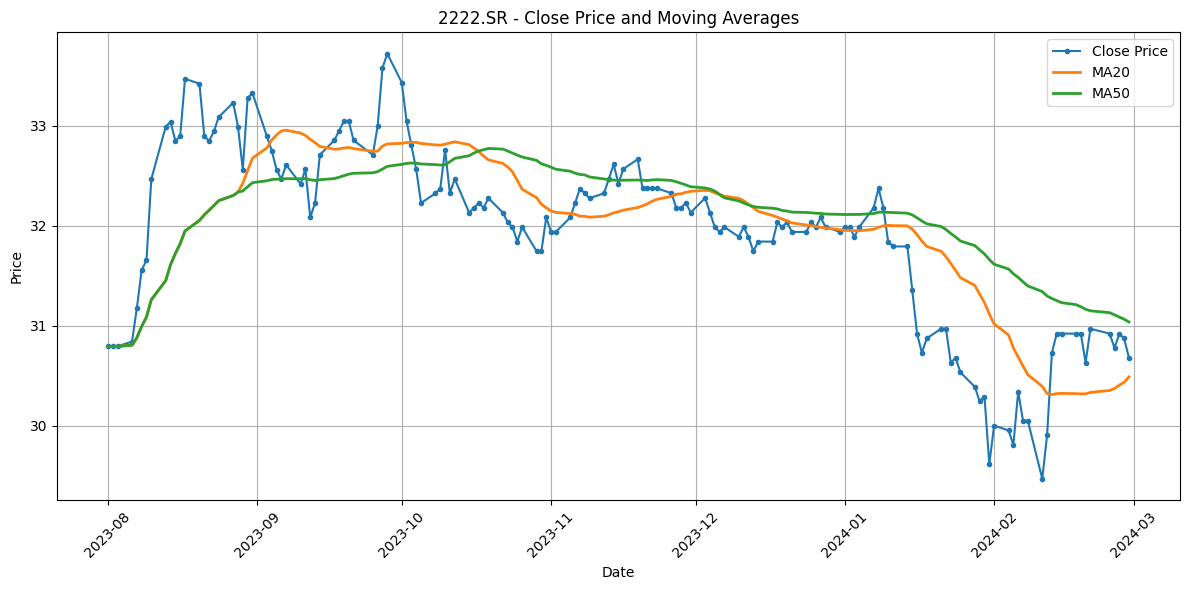

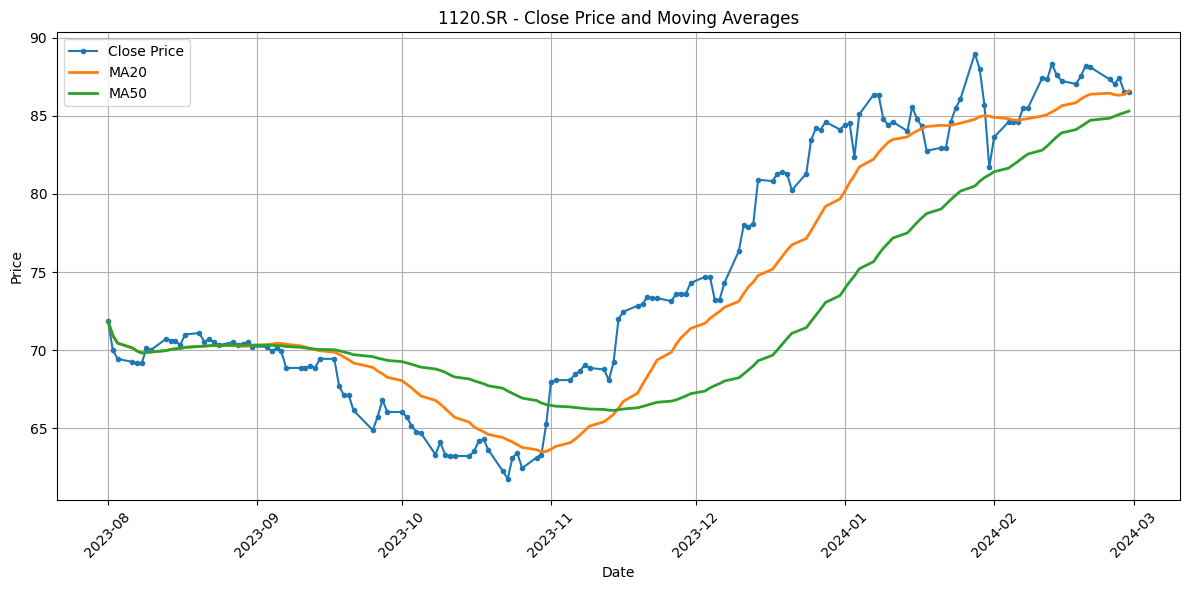

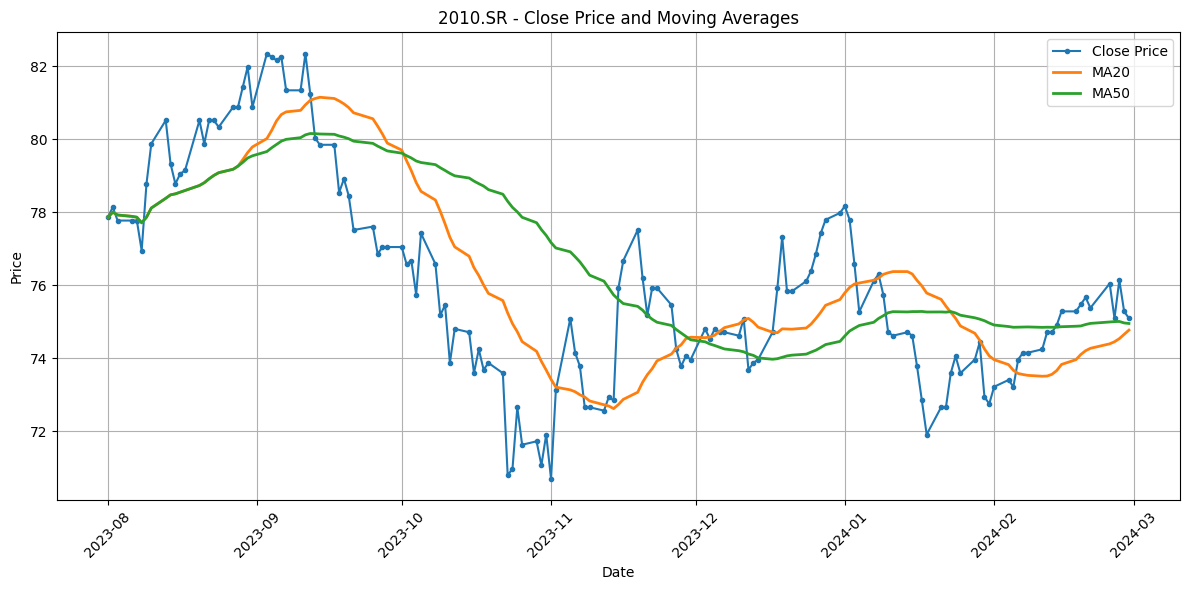

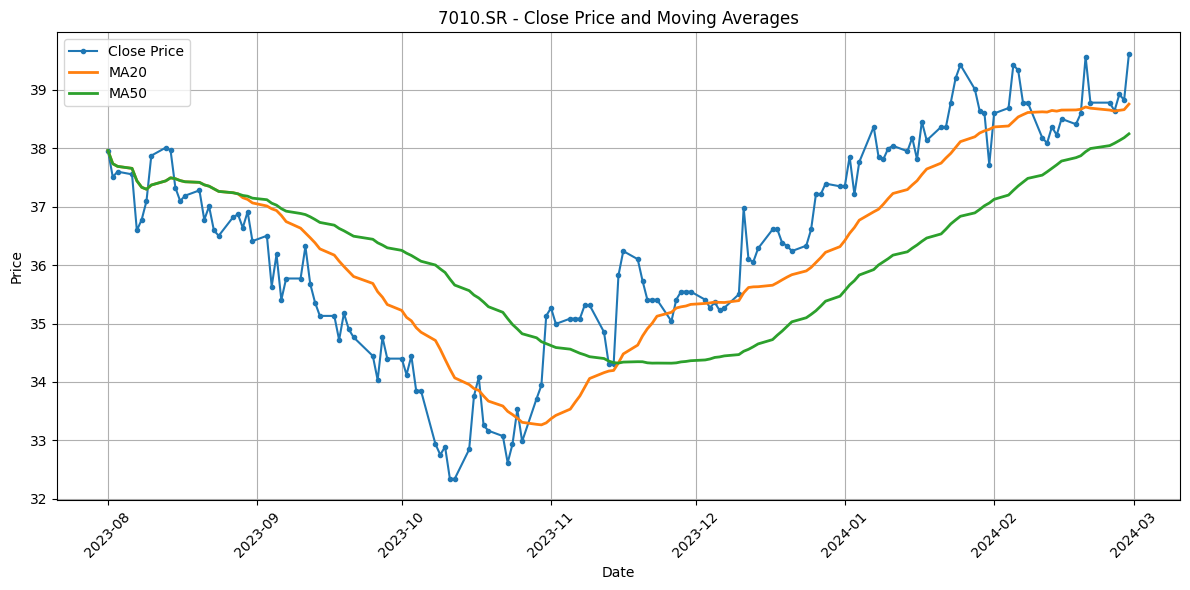

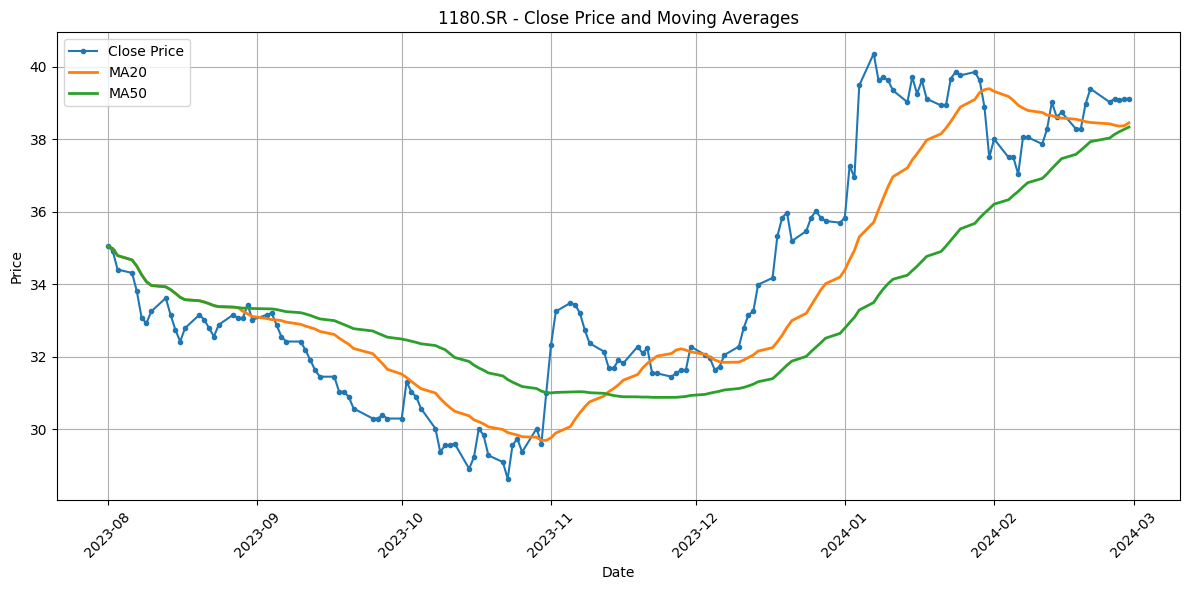

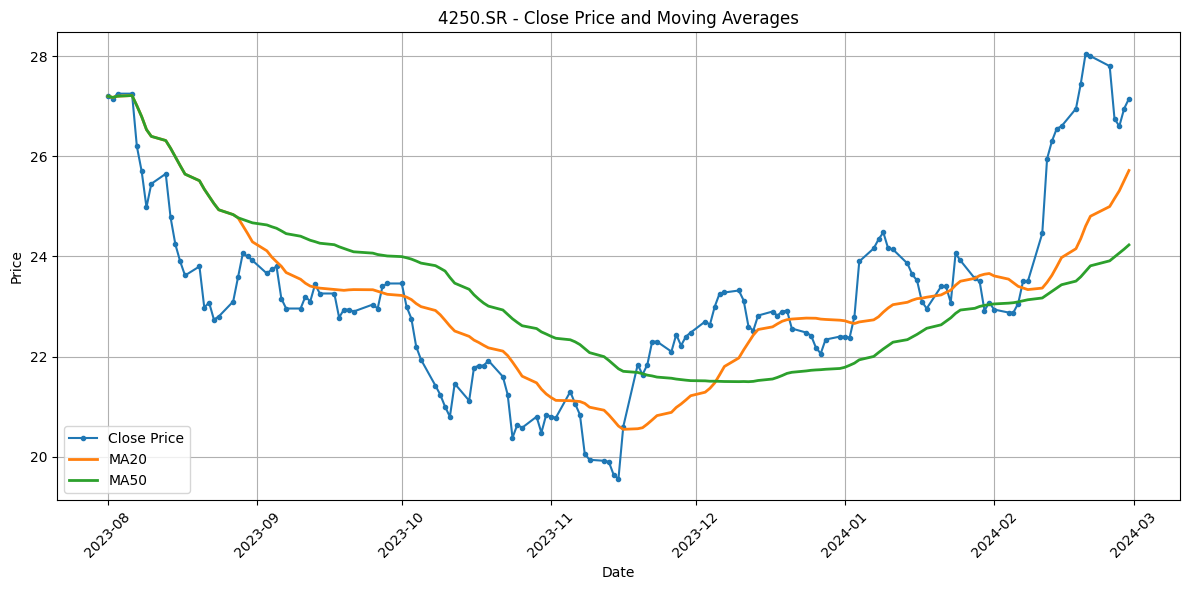

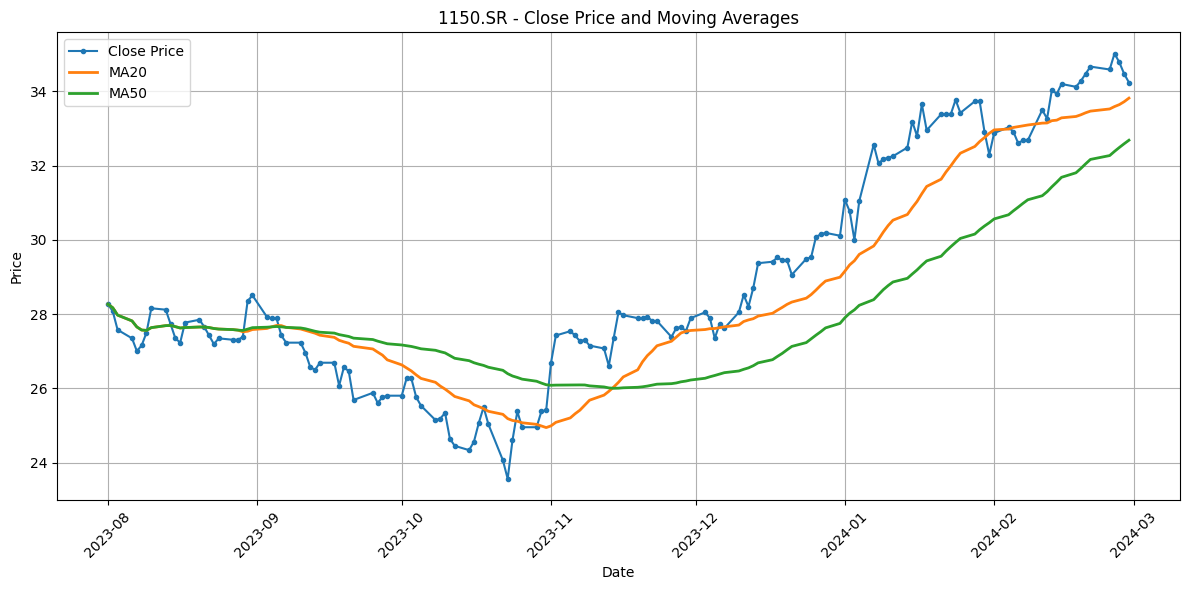

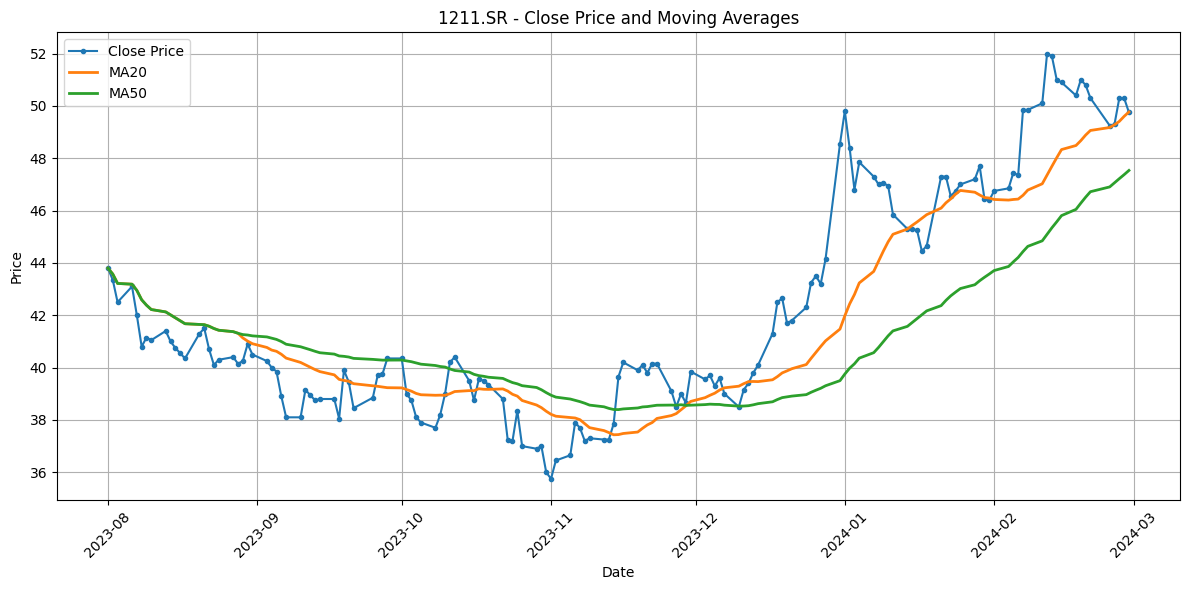

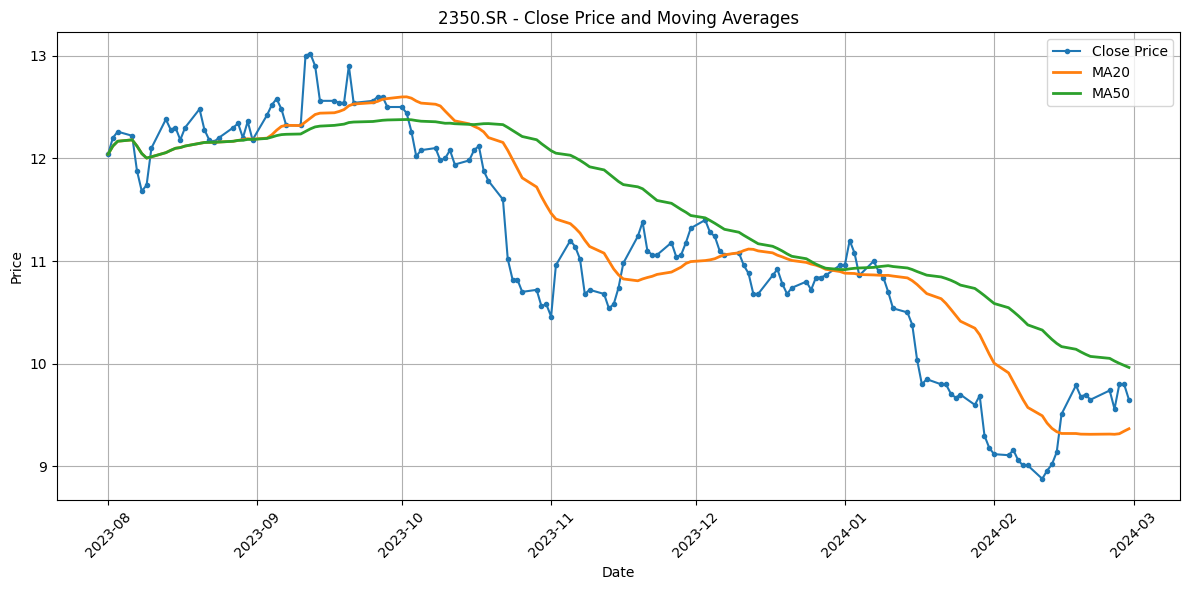

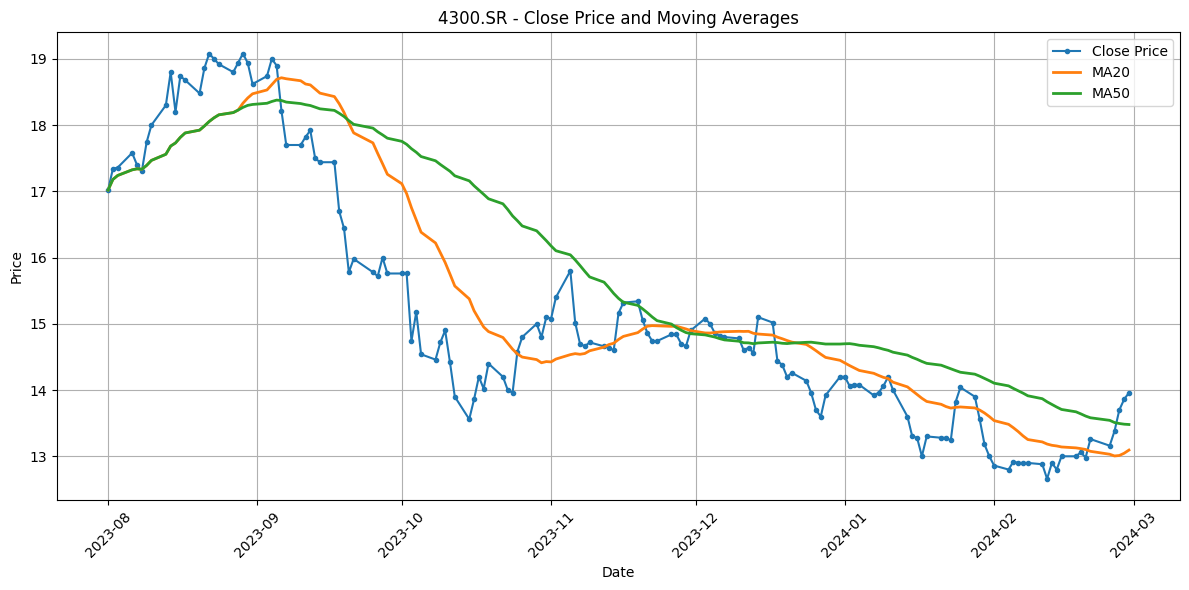

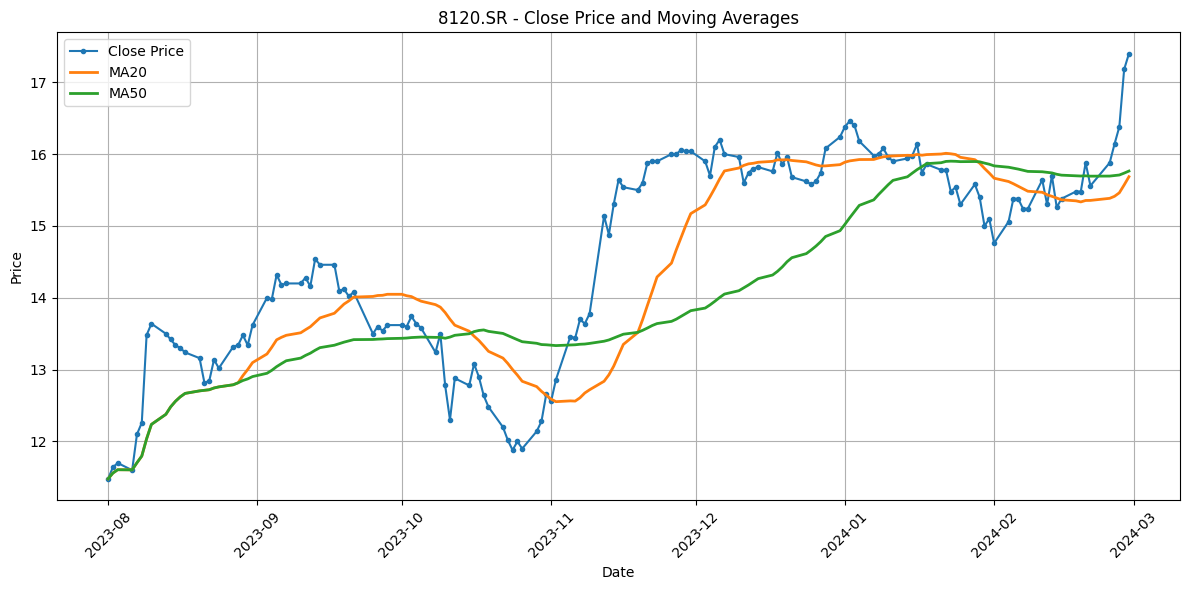

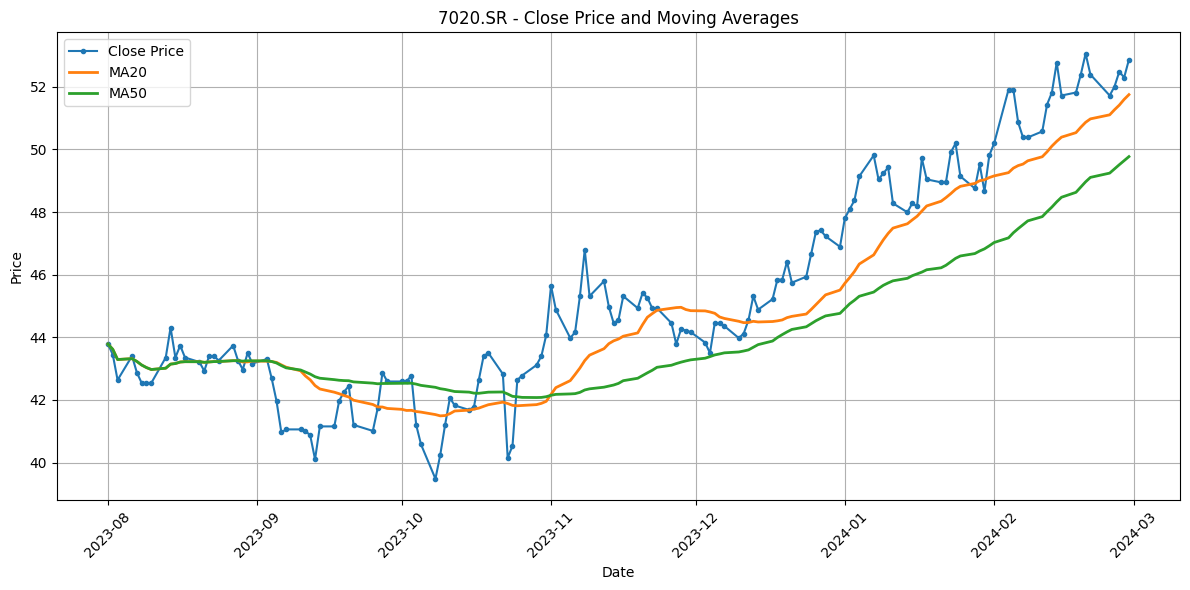

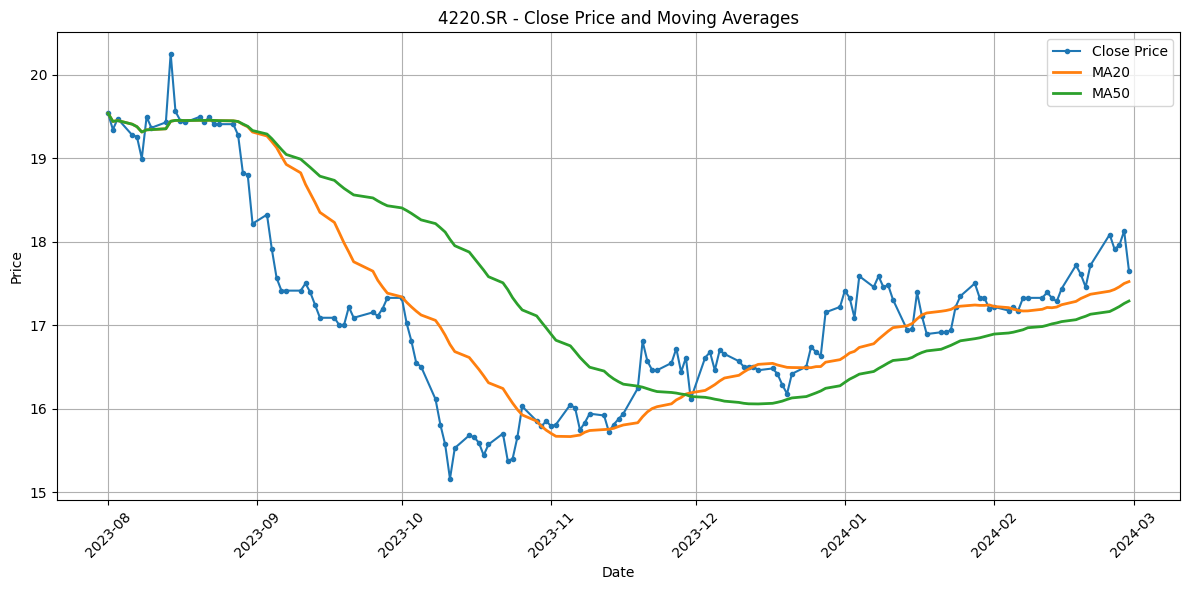

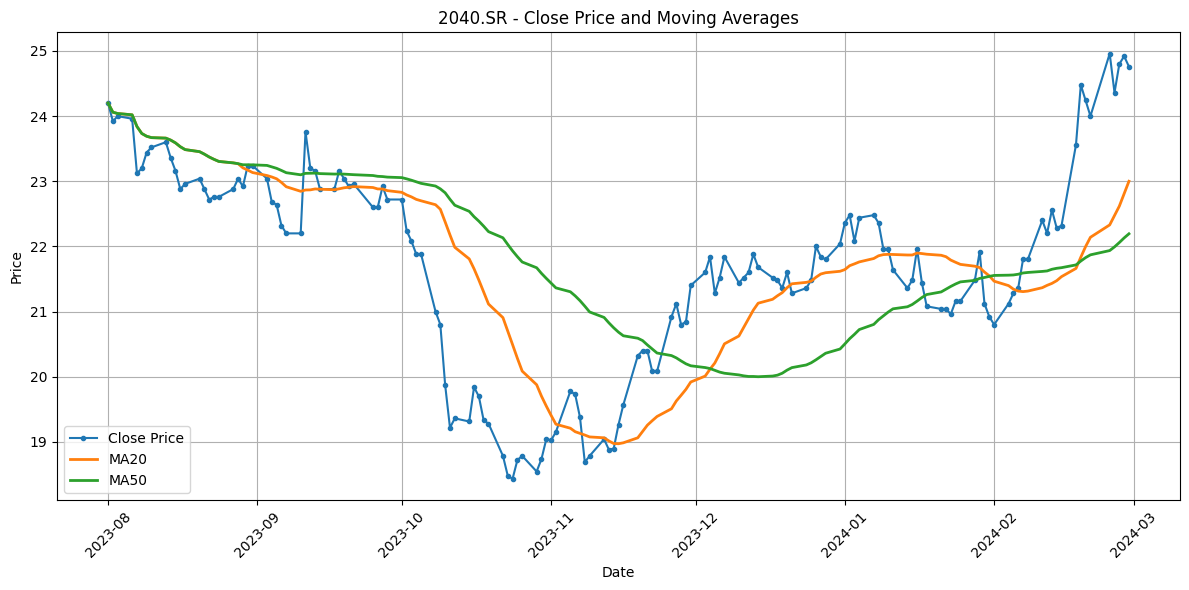

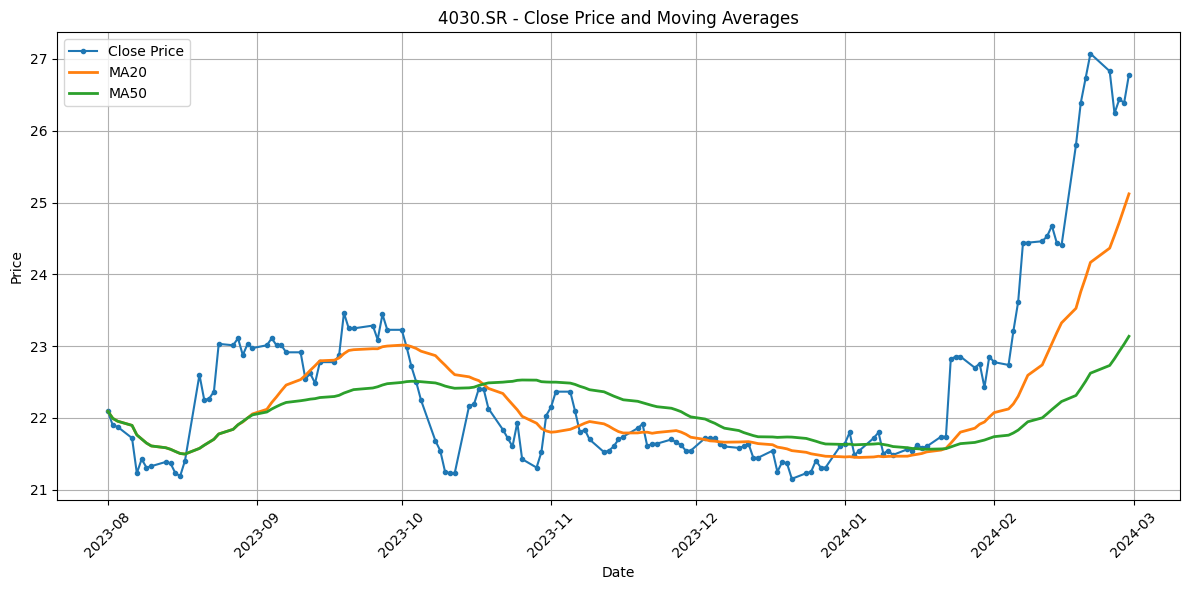

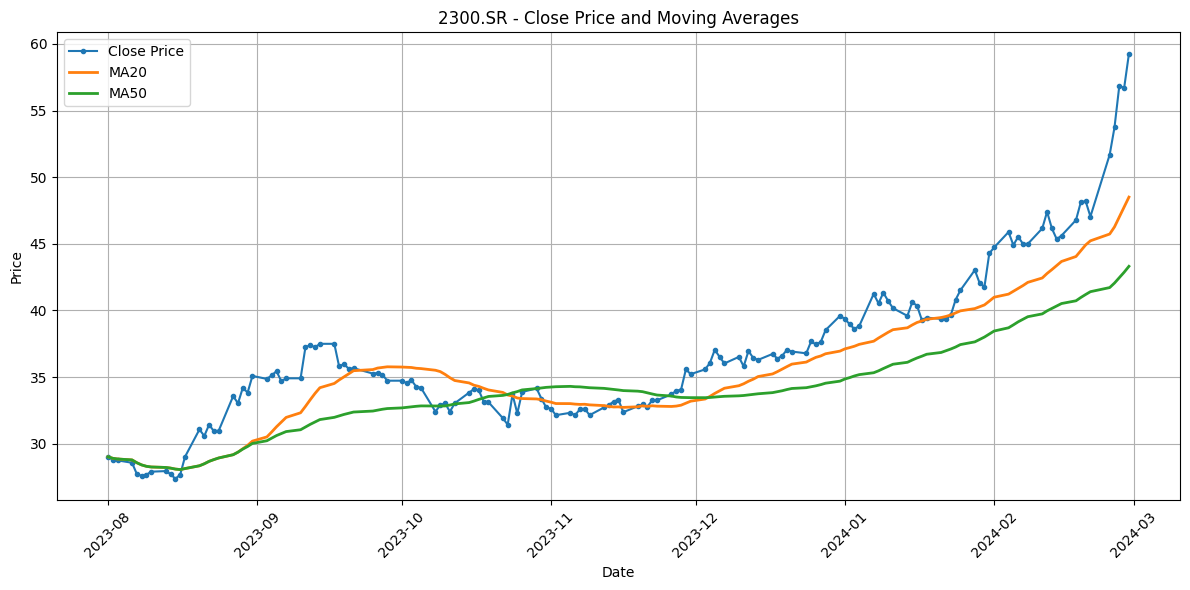

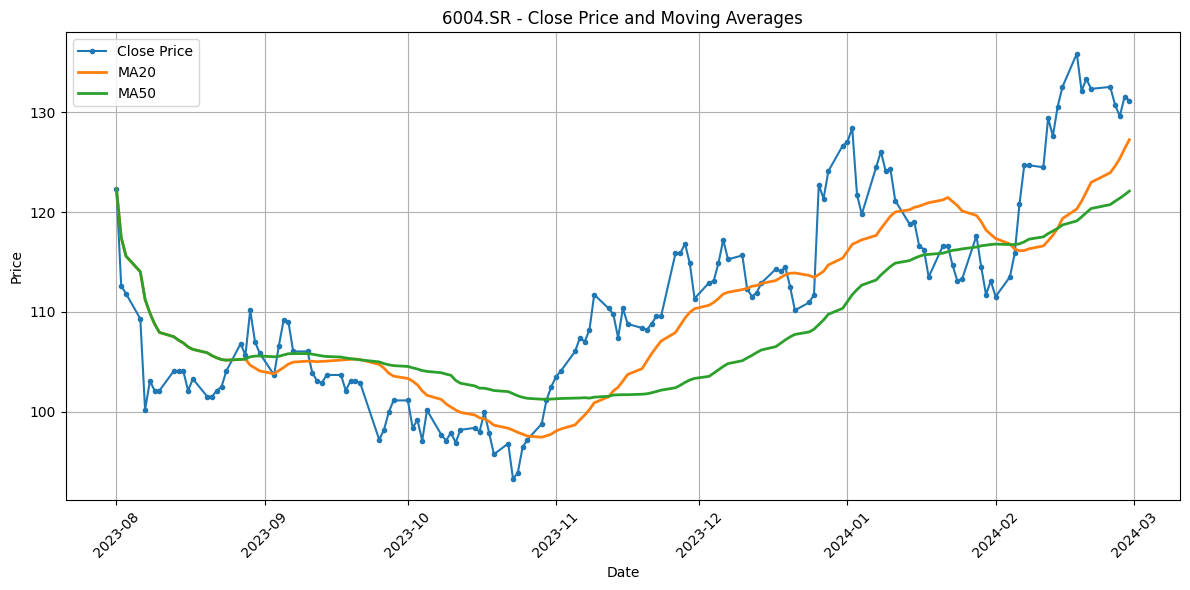

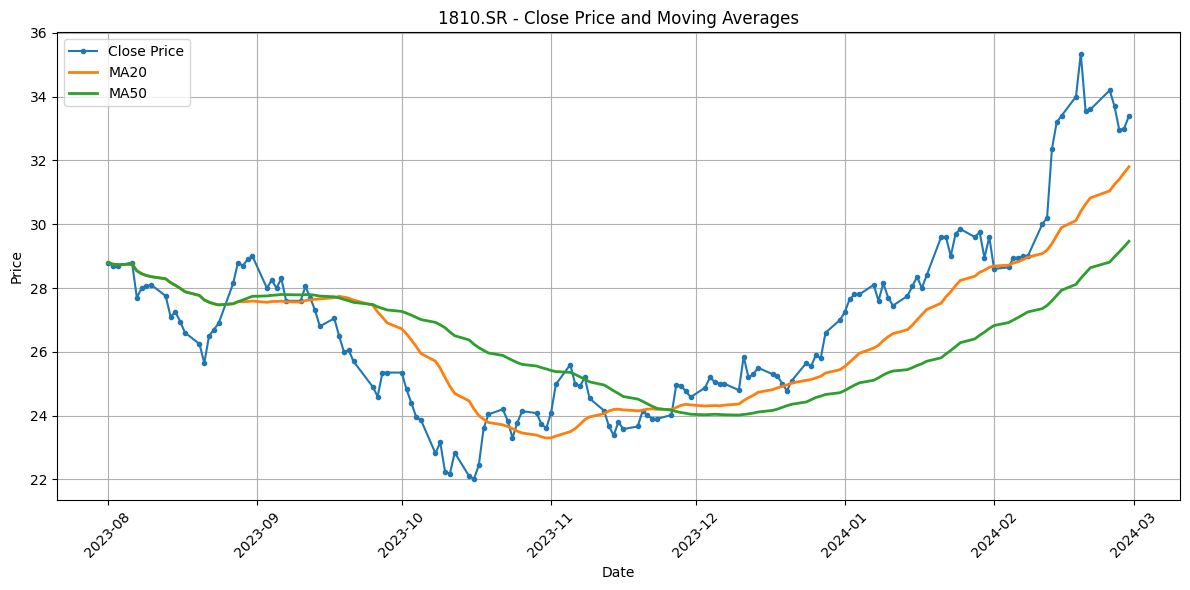

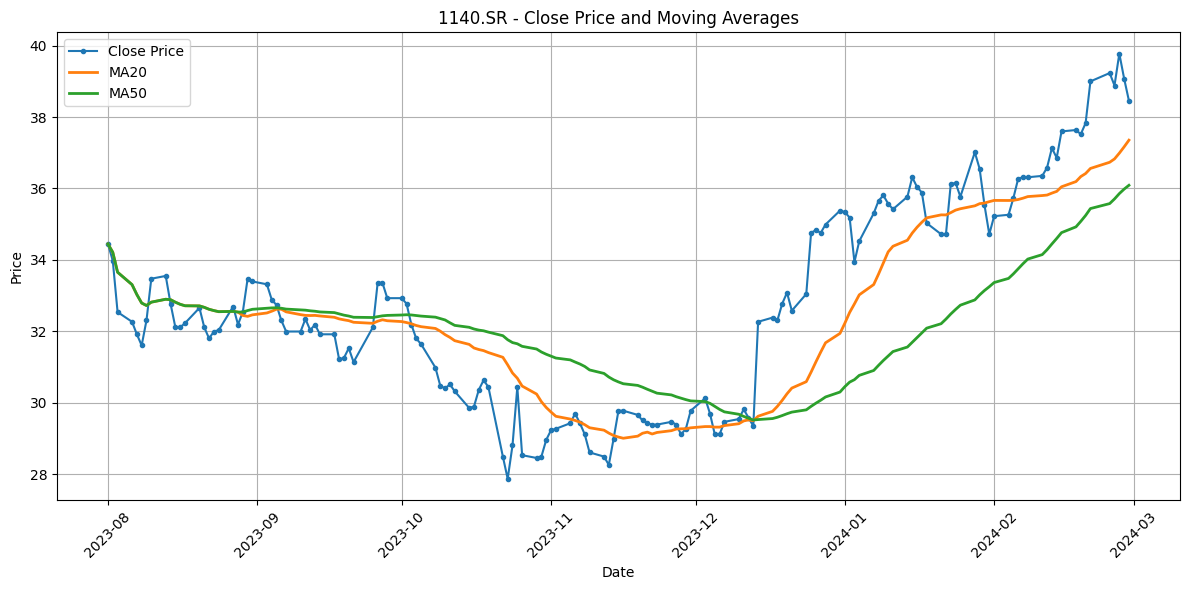

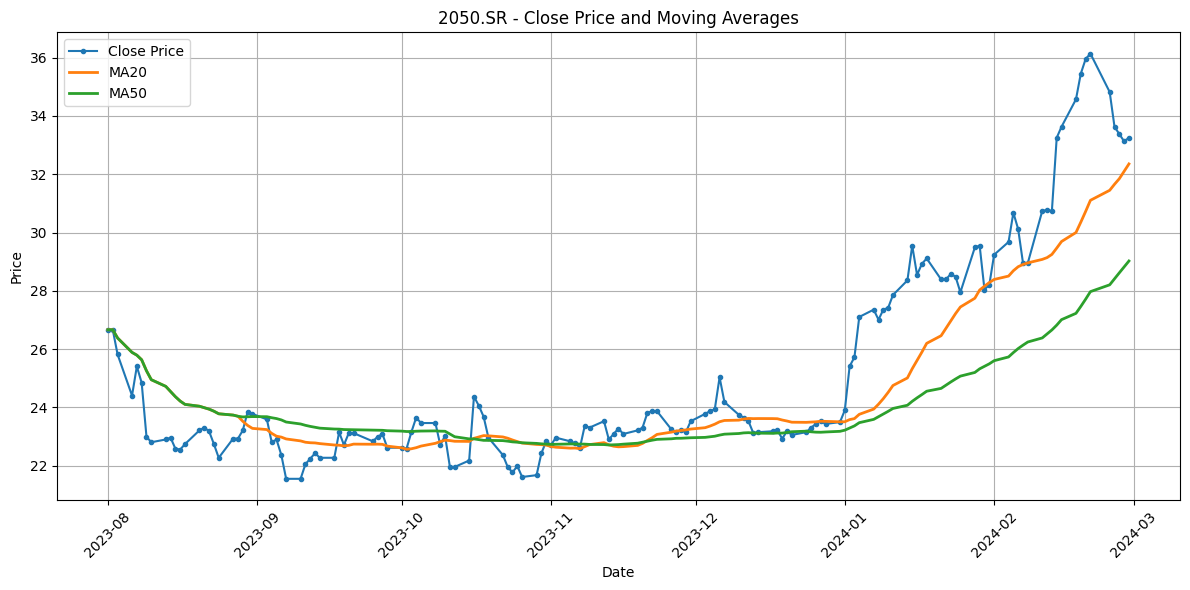

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة البيانات من ملف CSV مع تحويل عمود التاريخ إلى صيغة datetime
df = pd.read_csv("stocks_ma20_ma50.csv", parse_dates=["Date"])

# الحصول على قائمة الأسهم الفريدة في البيانات
unique_stocks = df["Stock"].unique()

# رسم مخطط لكل سهم
for stock in unique_stocks:
    stock_df = df[df["Stock"] == stock].sort_values("Date")

    plt.figure(figsize=(12, 6))
    plt.plot(stock_df["Date"], stock_df["Close"], label="Close Price", marker="o", markersize=3)
    plt.plot(stock_df["Date"], stock_df["MA20"], label="MA20", linewidth=2)
    plt.plot(stock_df["Date"], stock_df["MA50"], label="MA50", linewidth=2)

    plt.title(f"{stock} - Close Price and Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [5]:
pip install yfinance matplotlib mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.8 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed

==== BULLISH PATTERNS ====

Plotting: Flag (Bullish) | Ticker: 2222.SR


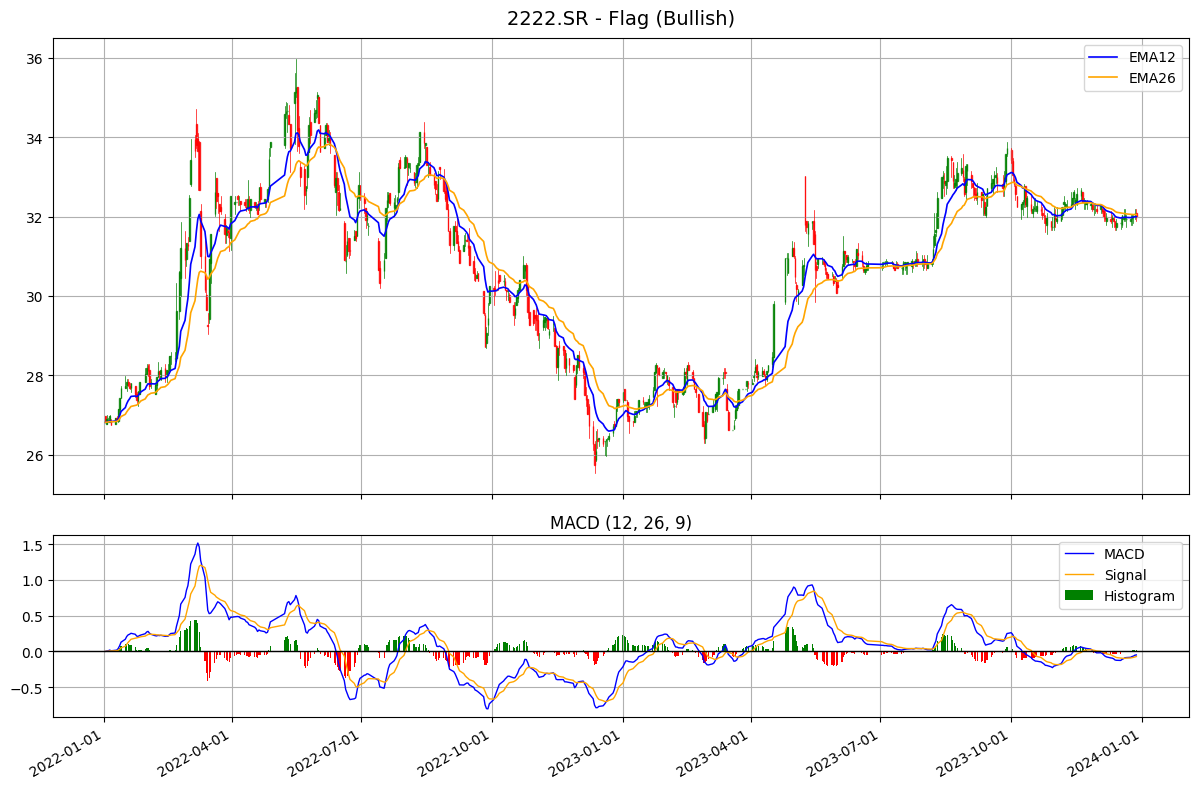

[*********************100%***********************]  1 of 1 completed


Plotting: Pennant (Bullish) | Ticker: 1120.SR


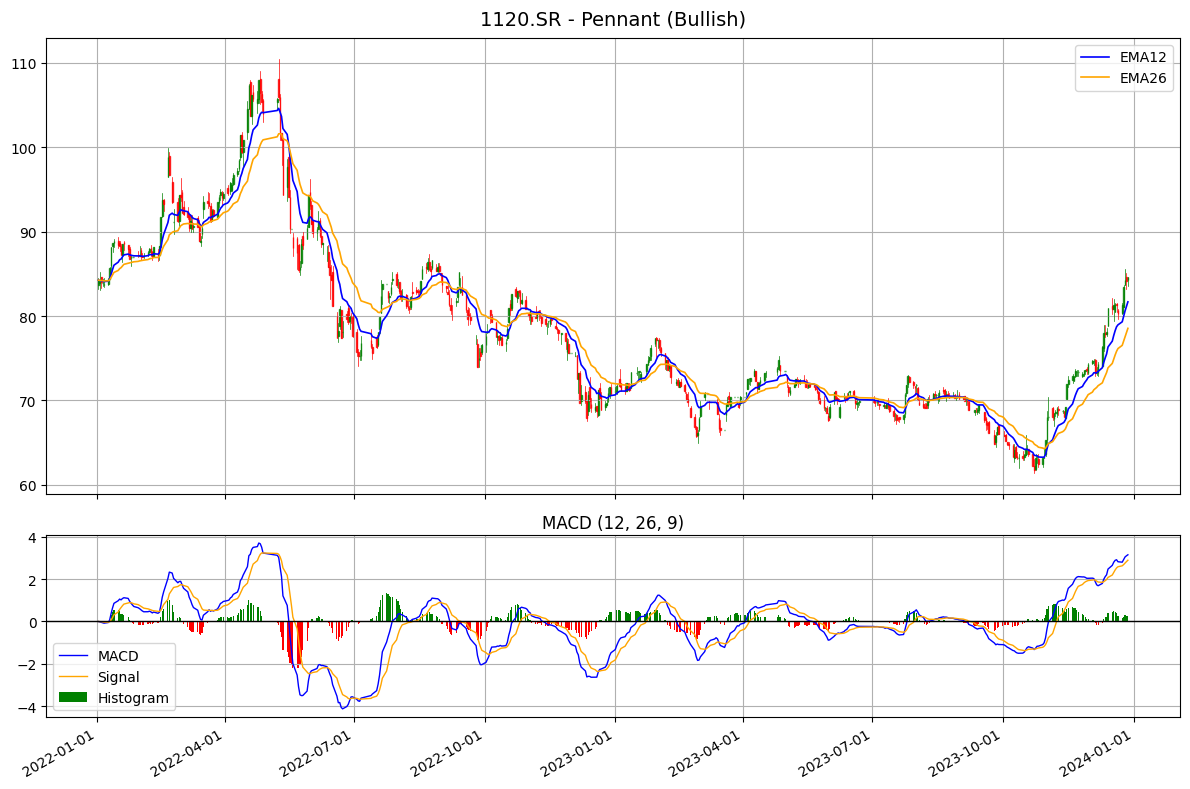

[*********************100%***********************]  1 of 1 completed


Plotting: Cup with Handle | Ticker: 2010.SR


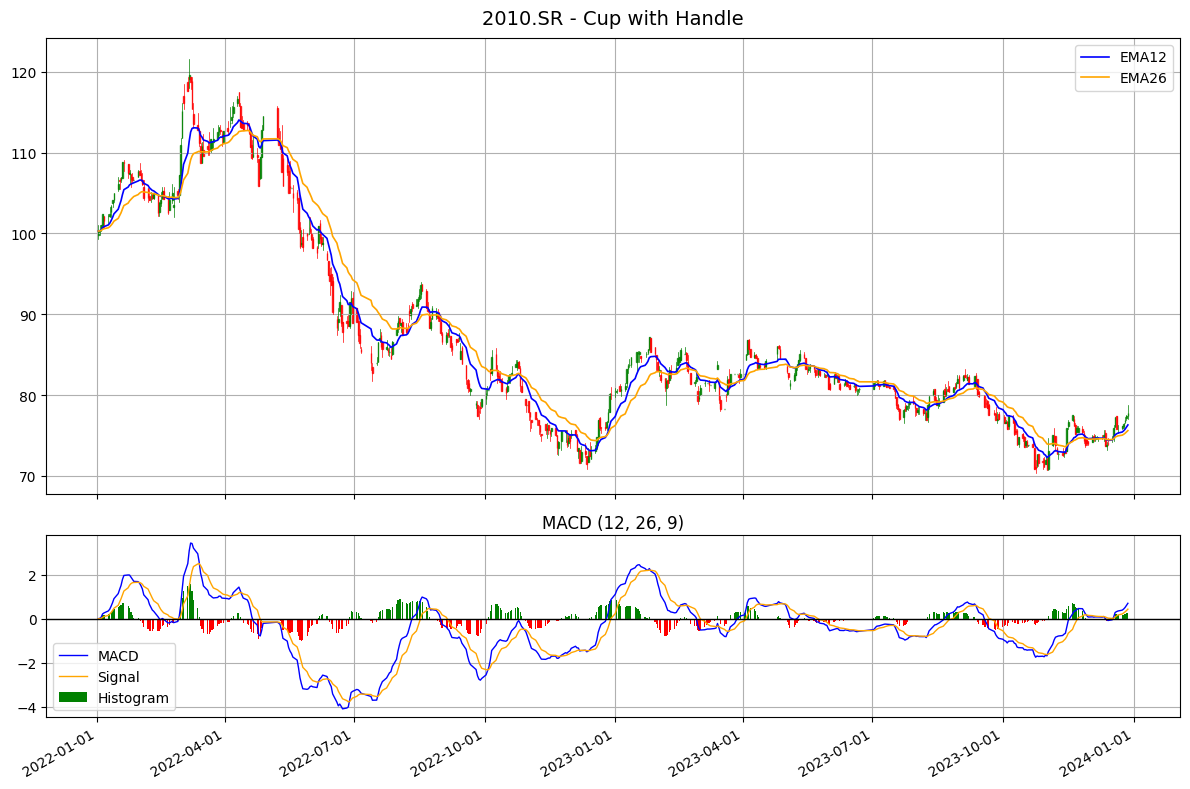

[*********************100%***********************]  1 of 1 completed


Plotting: Ascending Triangle | Ticker: 7010.SR


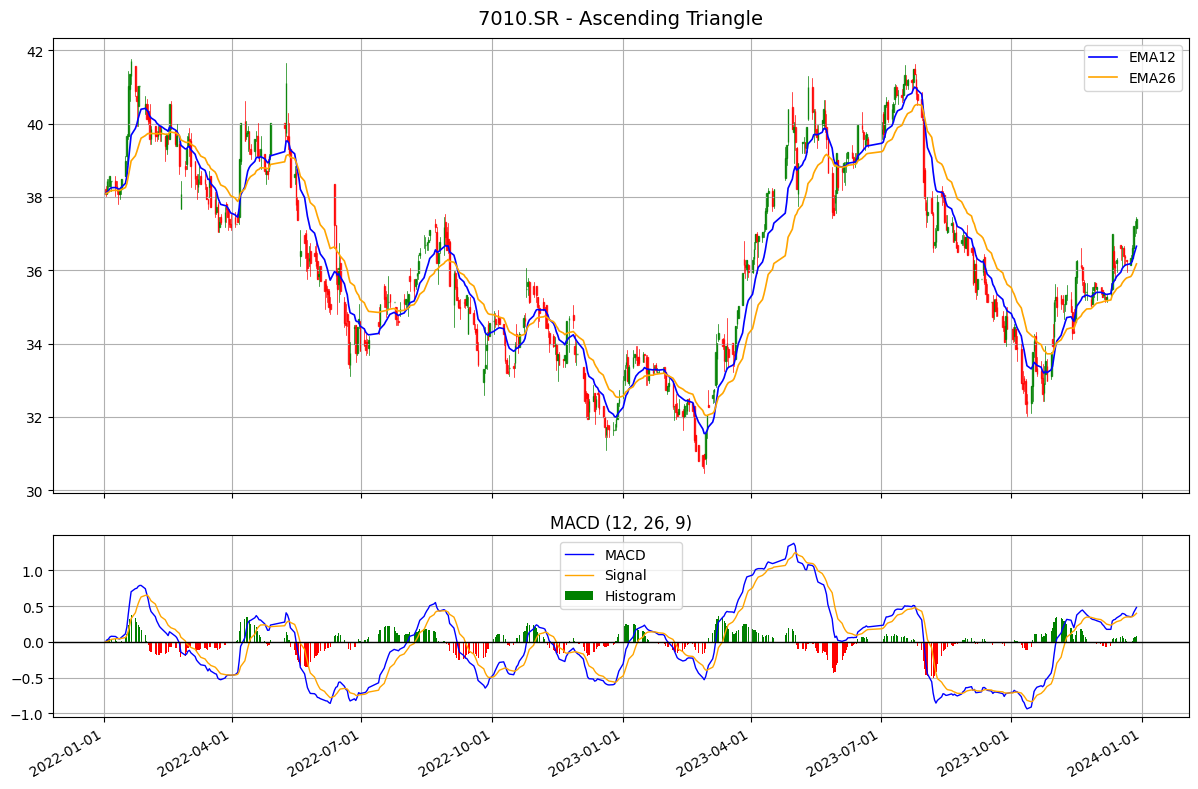

[*********************100%***********************]  1 of 1 completed


Plotting: Symmetrical Triangle (Bullish) | Ticker: 1180.SR


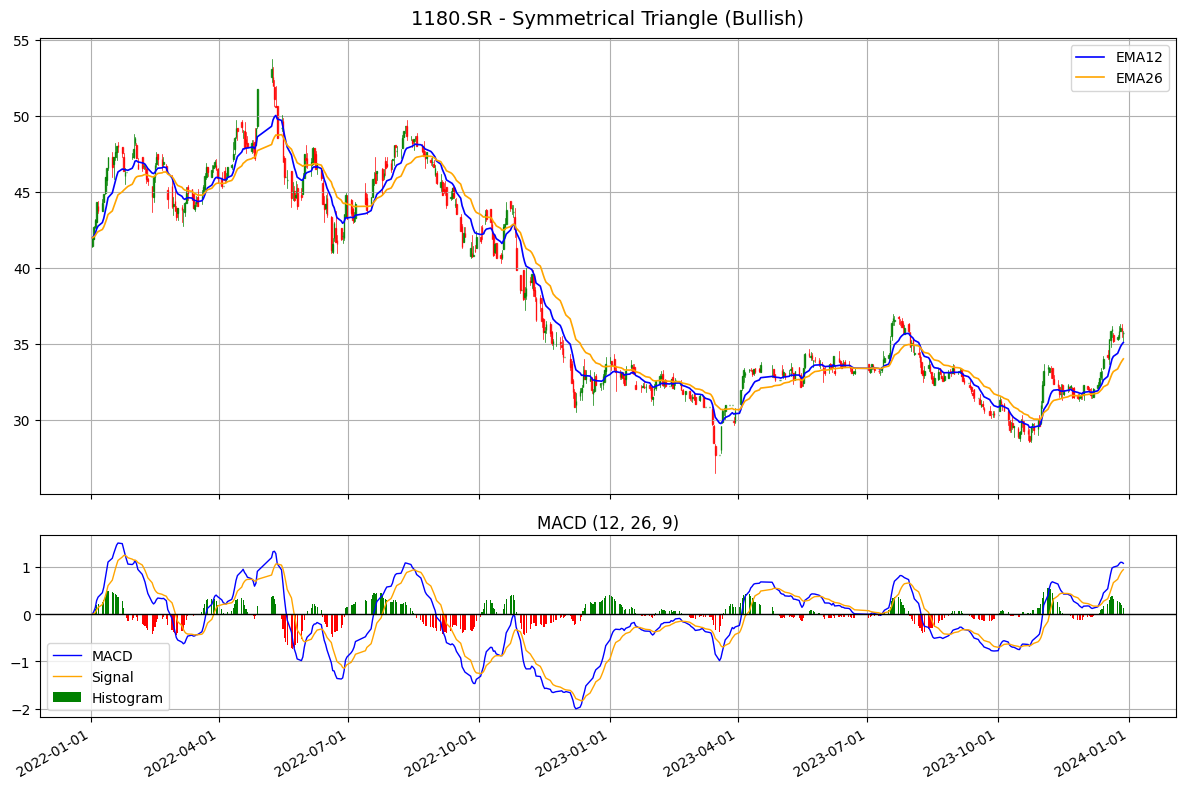

[*********************100%***********************]  1 of 1 completed


Plotting: Measured Move Up | Ticker: 4250.SR


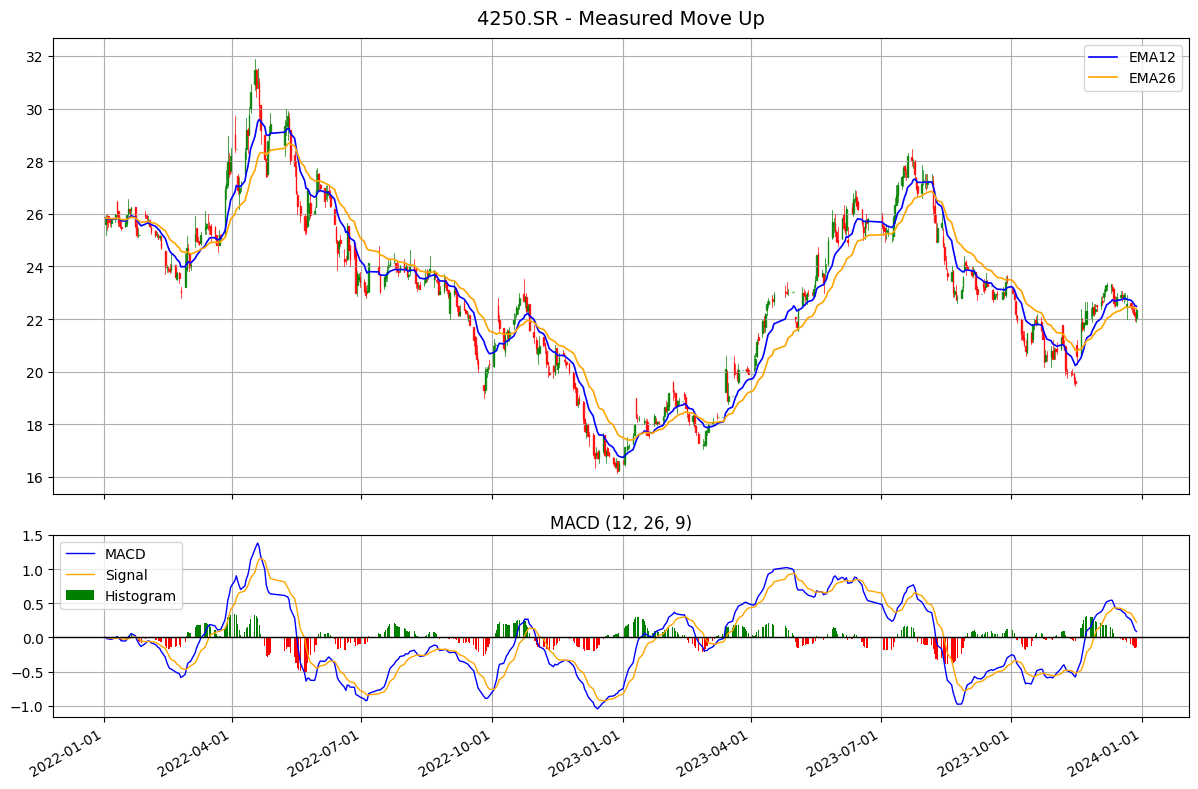

[*********************100%***********************]  1 of 1 completed


Plotting: Ascending Scallop | Ticker: 1150.SR


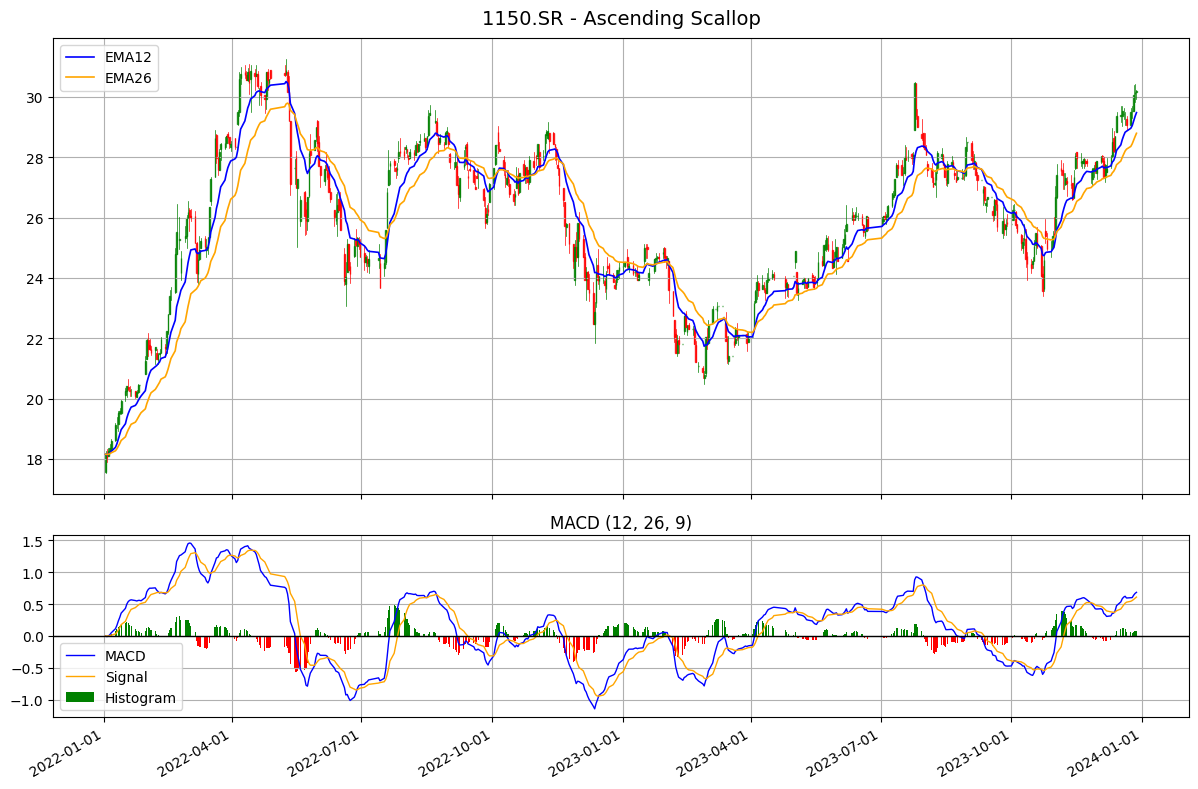

[*********************100%***********************]  1 of 1 completed


Plotting: 3 Rising Valleys | Ticker: 1211.SR


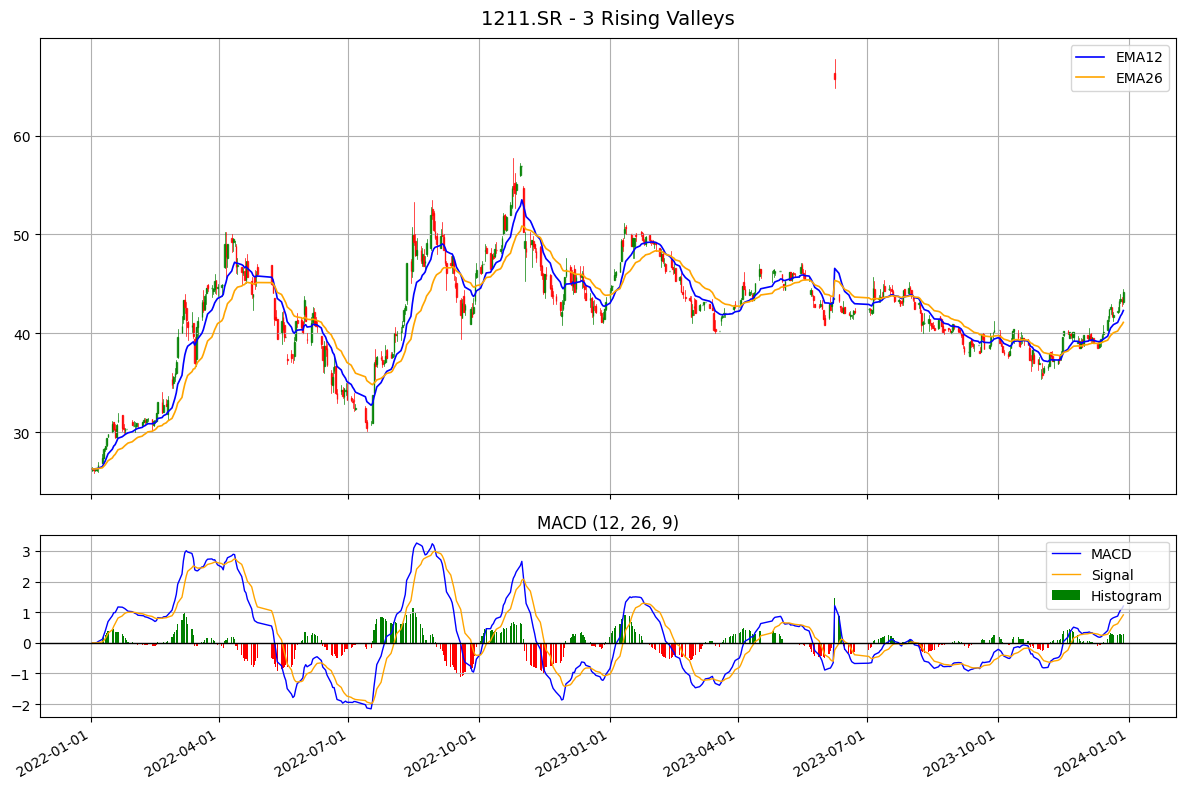

[*********************100%***********************]  1 of 1 completed

==== BEARISH PATTERNS ====

Plotting: Flag (Bearish) | Ticker: 2350.SR


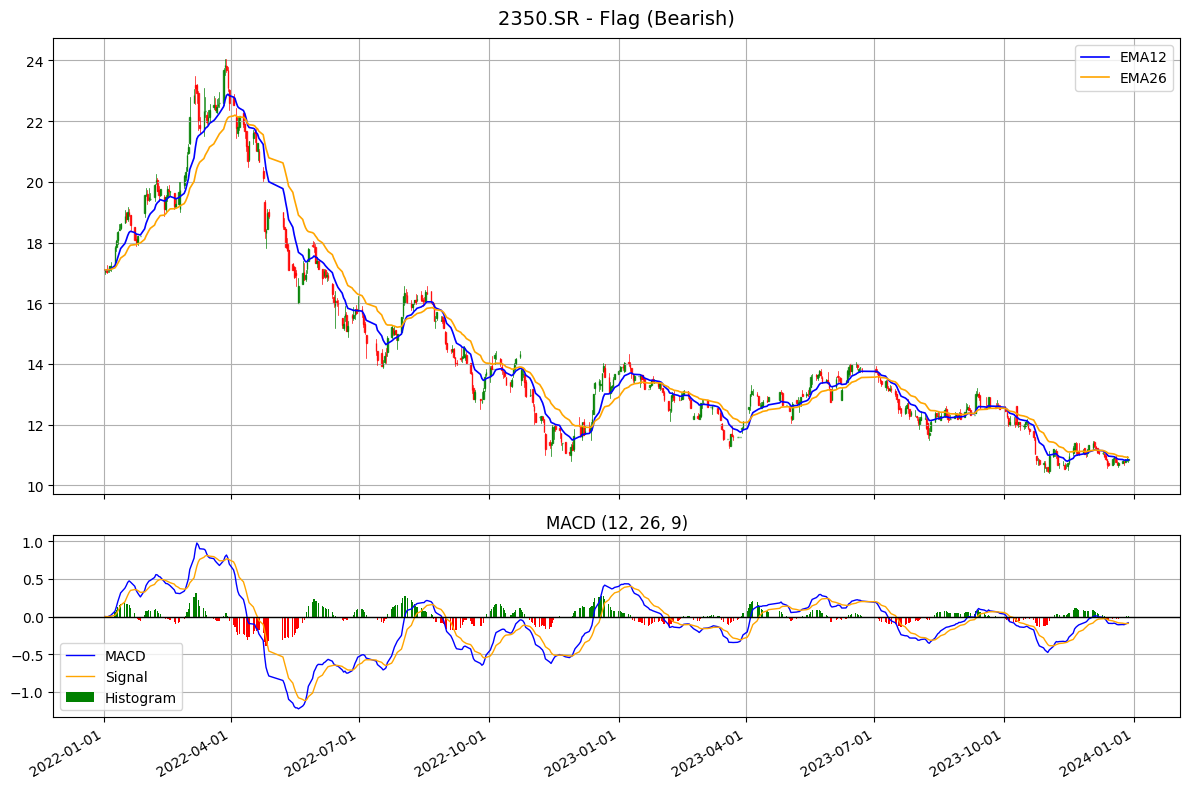

[*********************100%***********************]  1 of 1 completed


Plotting: Pennant (Bearish) | Ticker: 4300.SR


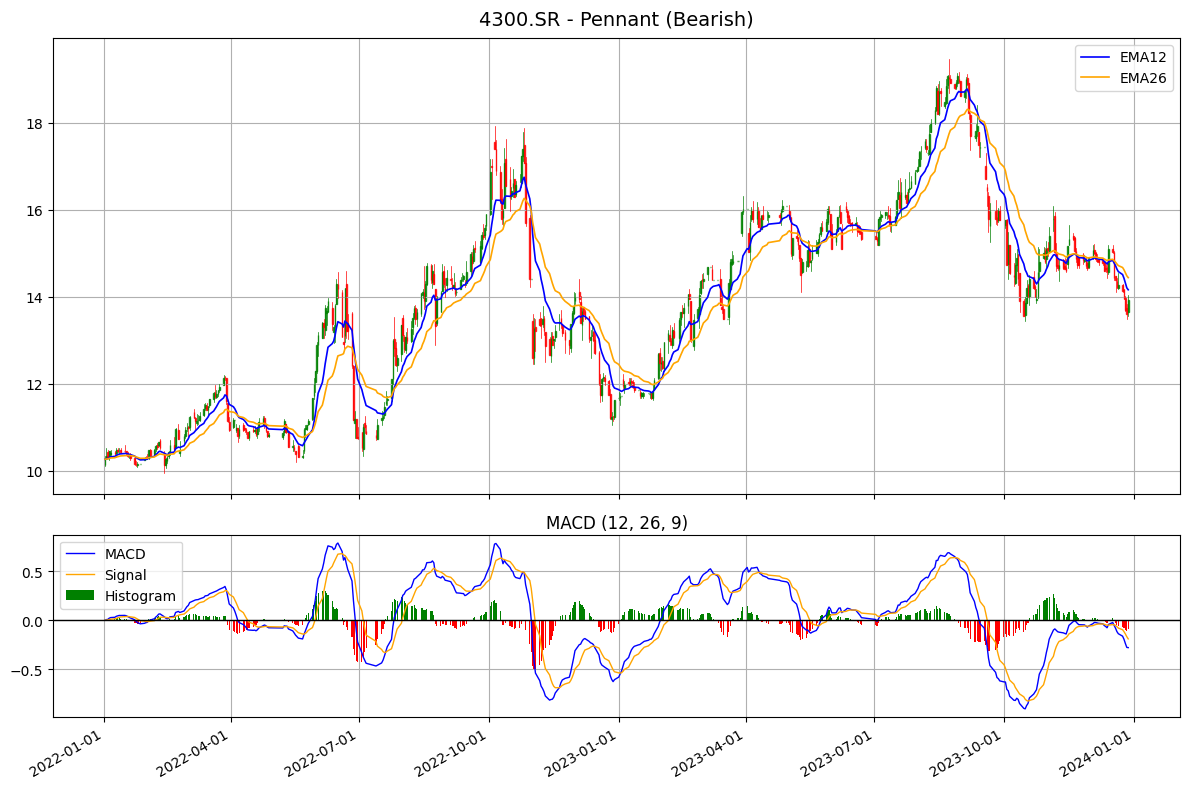

[*********************100%***********************]  1 of 1 completed


Plotting: Inverted Cup with Handle | Ticker: 8120.SR


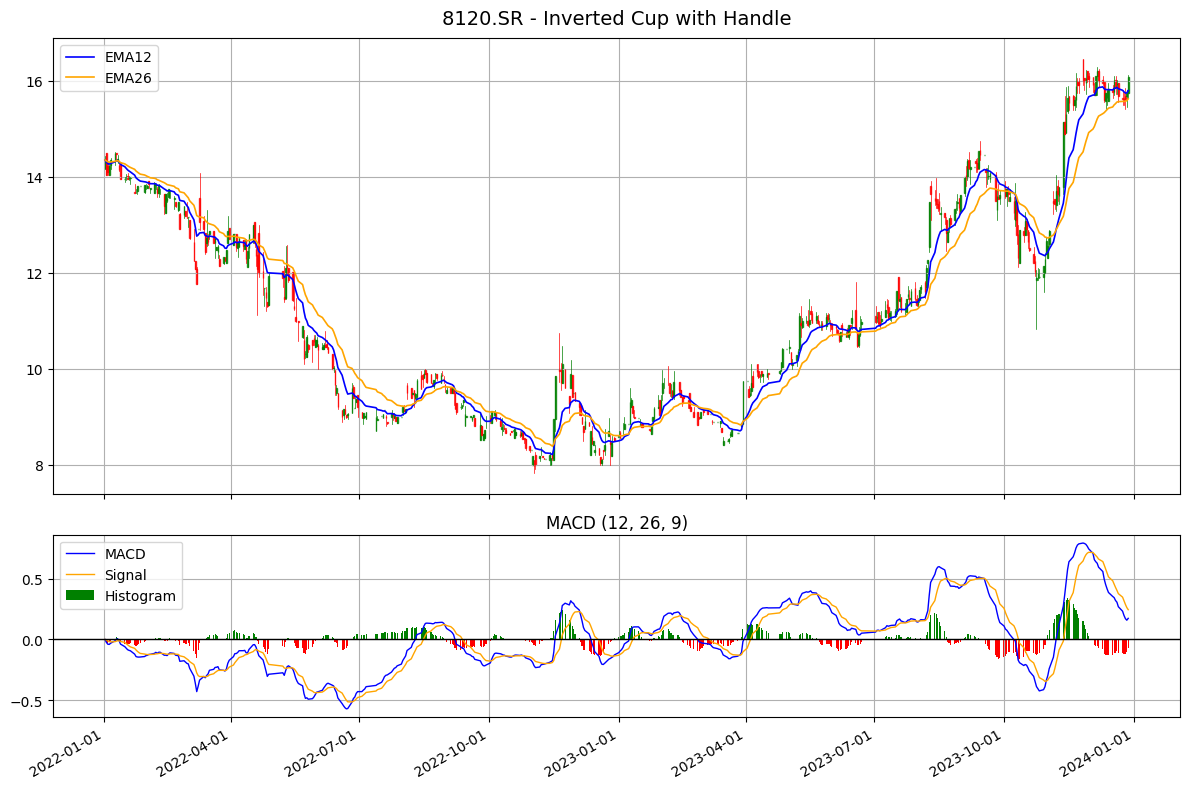

[*********************100%***********************]  1 of 1 completed


Plotting: Descending Triangle | Ticker: 7020.SR


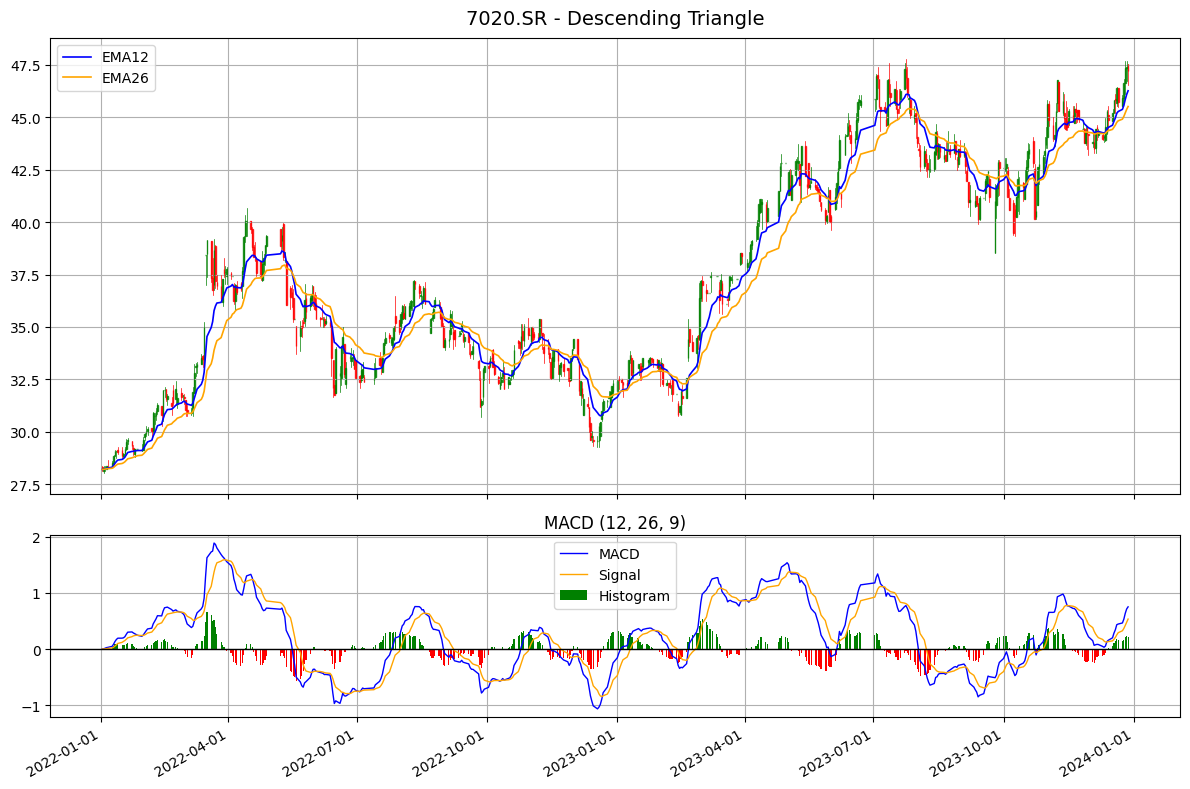

[*********************100%***********************]  1 of 1 completed


Plotting: Symmetrical Triangle (Bearish) | Ticker: 4220.SR


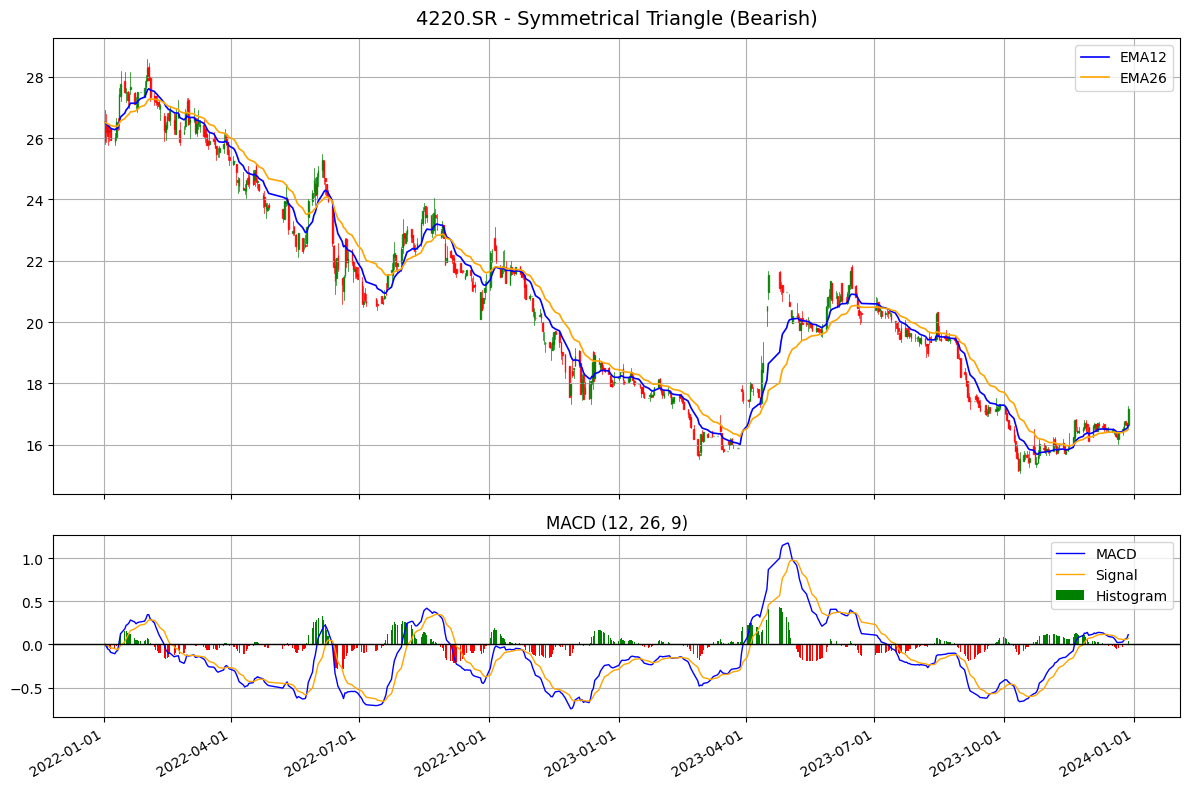

[*********************100%***********************]  1 of 1 completed


Plotting: Measured Move Down | Ticker: 2040.SR


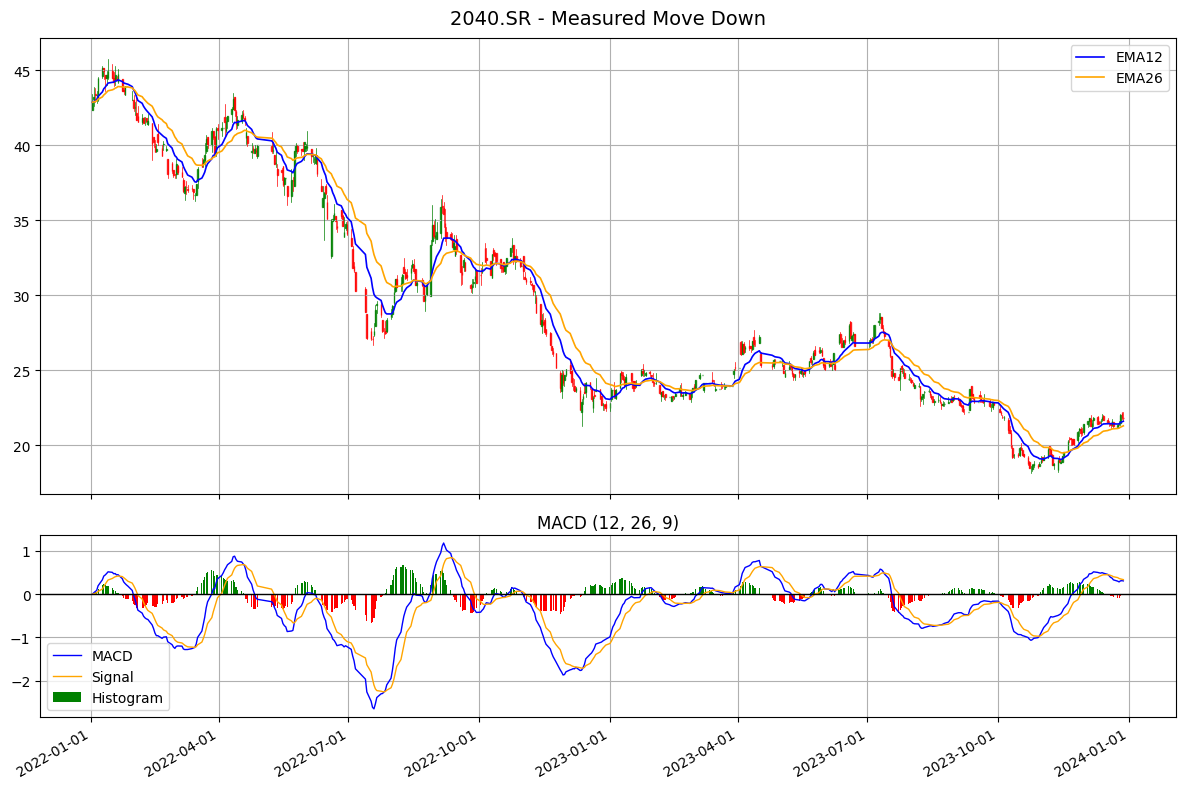


Plotting: Descending Scallop | Ticker: 4030.SR


[*********************100%***********************]  1 of 1 completed


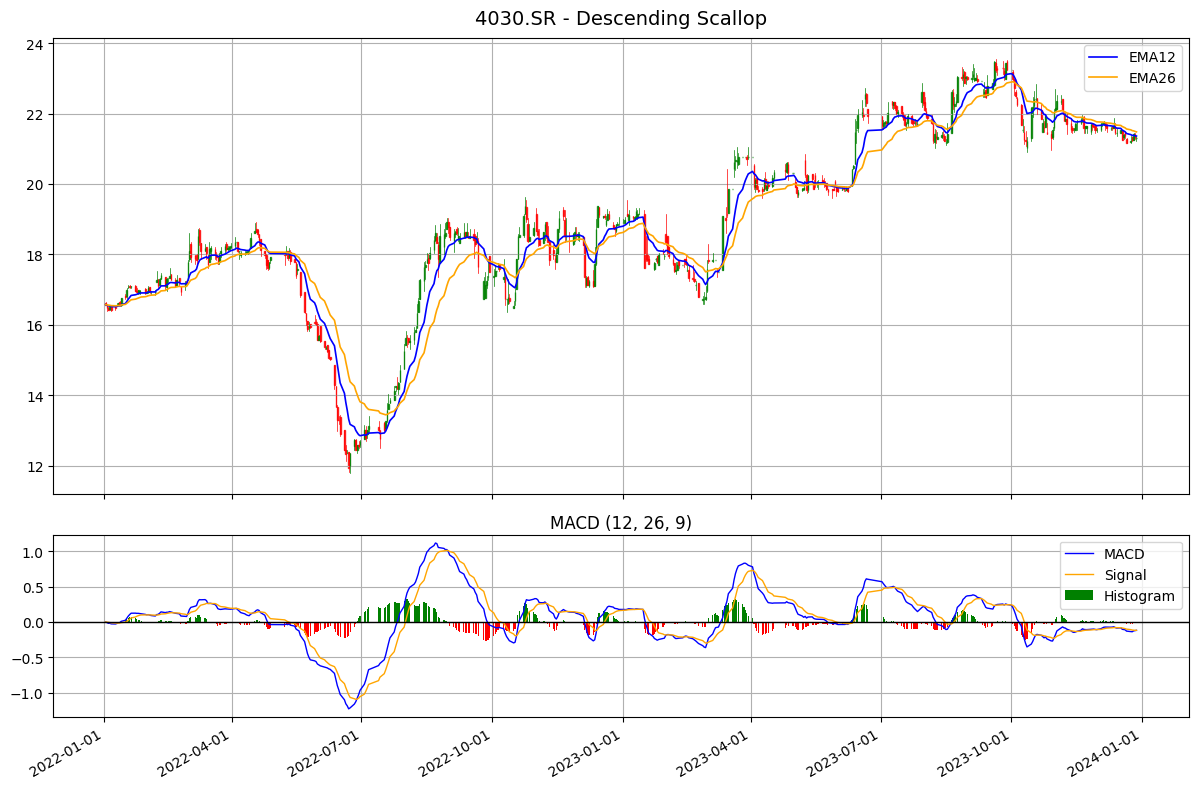

[*********************100%***********************]  1 of 1 completed


Plotting: 3 Descending Peaks | Ticker: 2300.SR


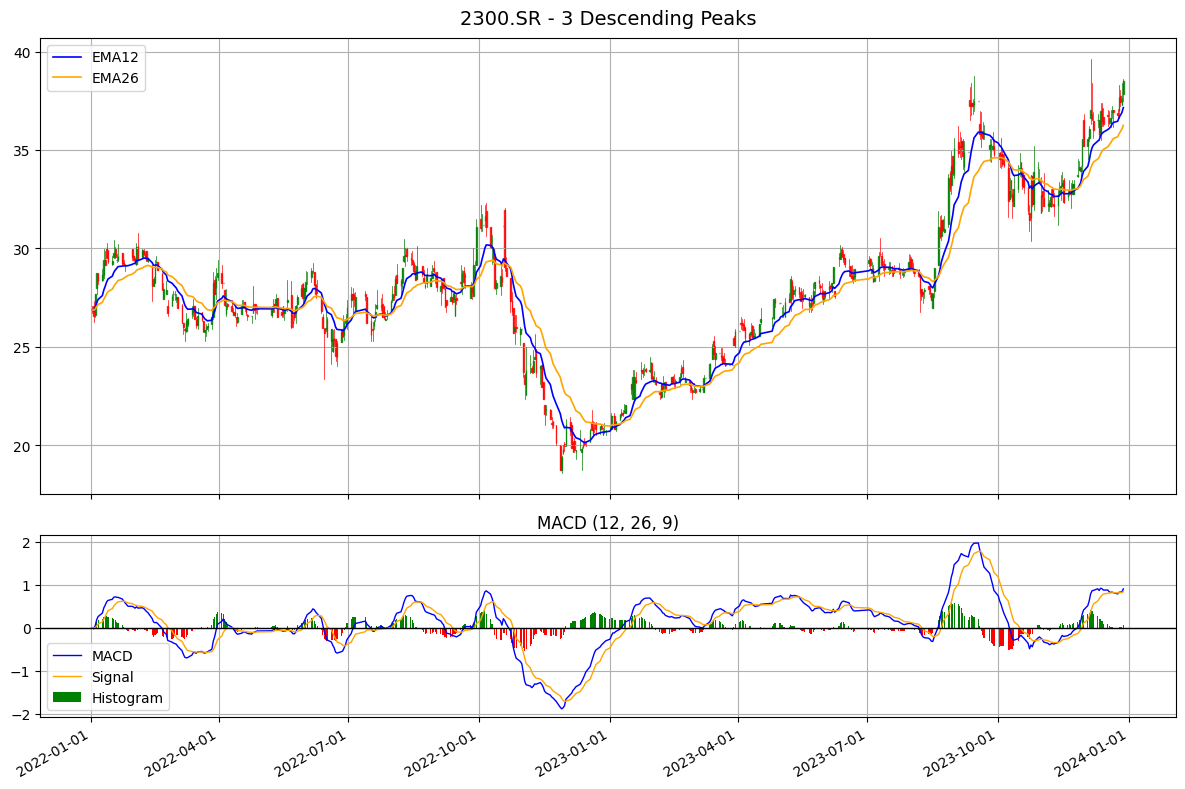

[*********************100%***********************]  1 of 1 completed

==== REVERSAL PATTERNS ====

Plotting: Double Bottoms | Ticker: 6004.SR


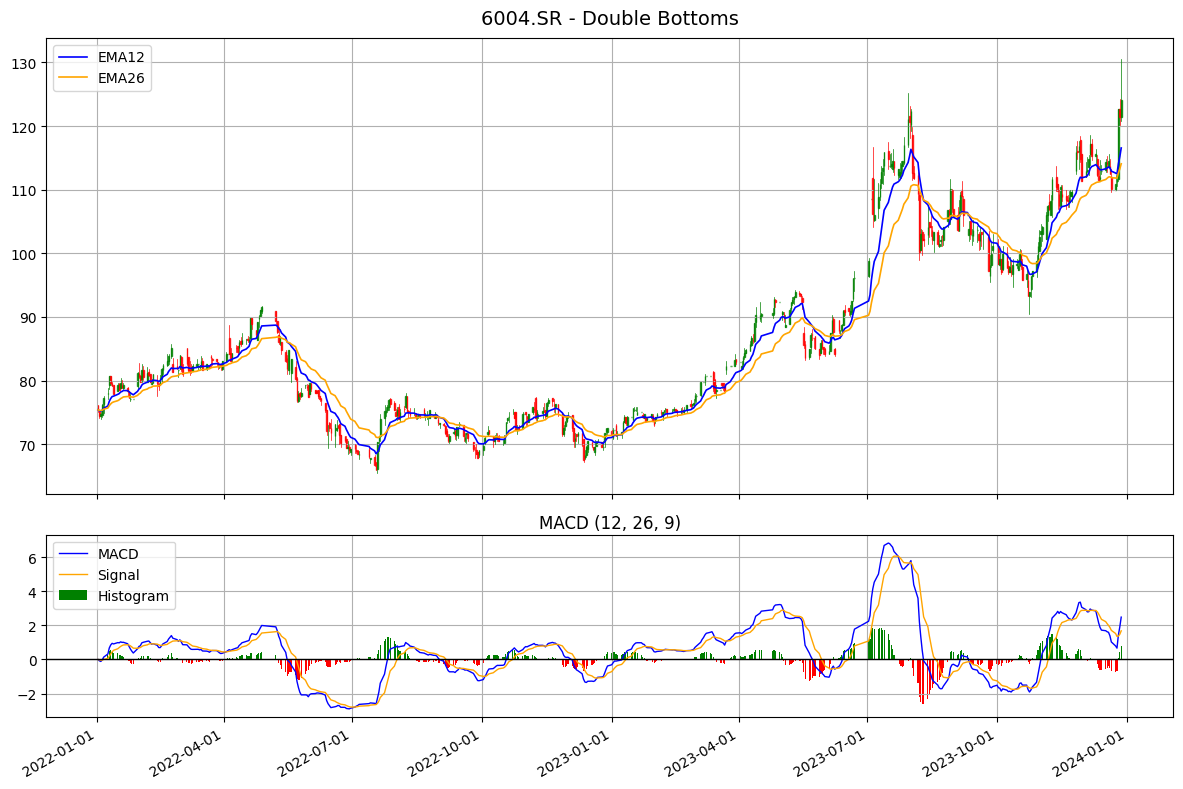

[*********************100%***********************]  1 of 1 completed


Plotting: Diamond Bottoms | Ticker: 1810.SR


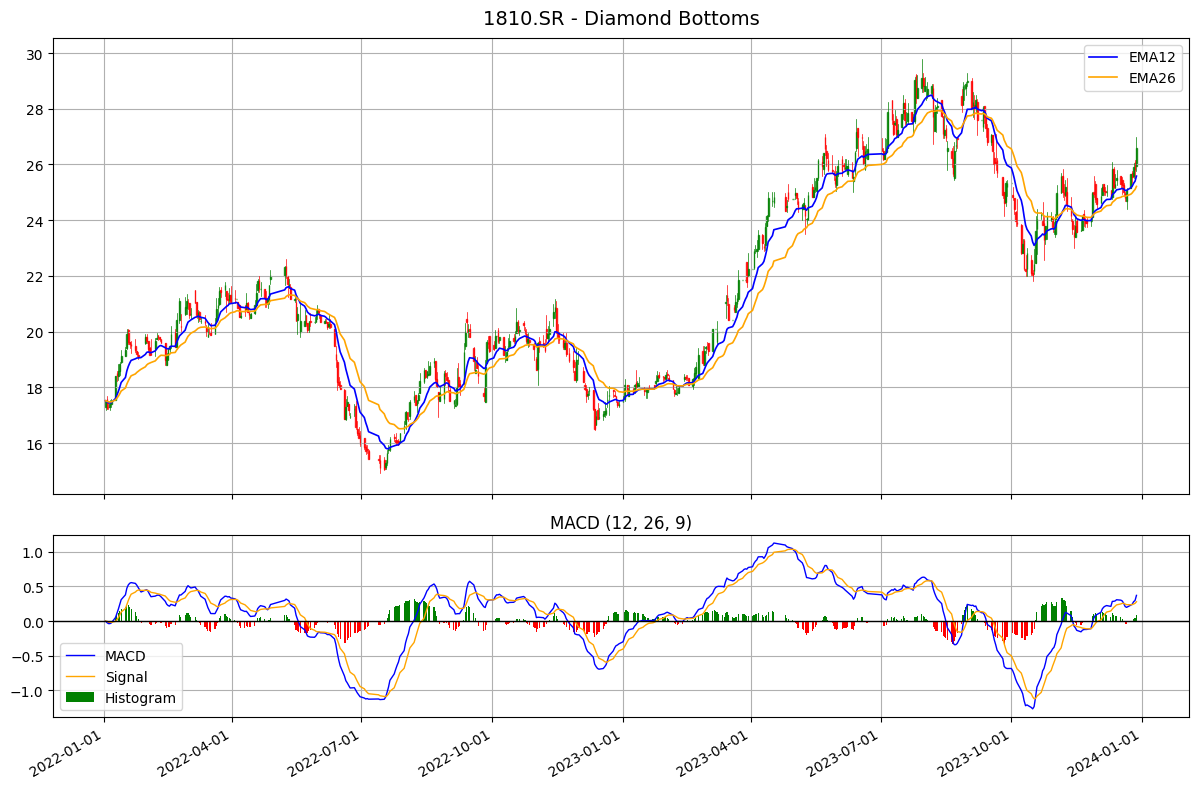

[*********************100%***********************]  1 of 1 completed


Plotting: Top Rectangle | Ticker: 1140.SR


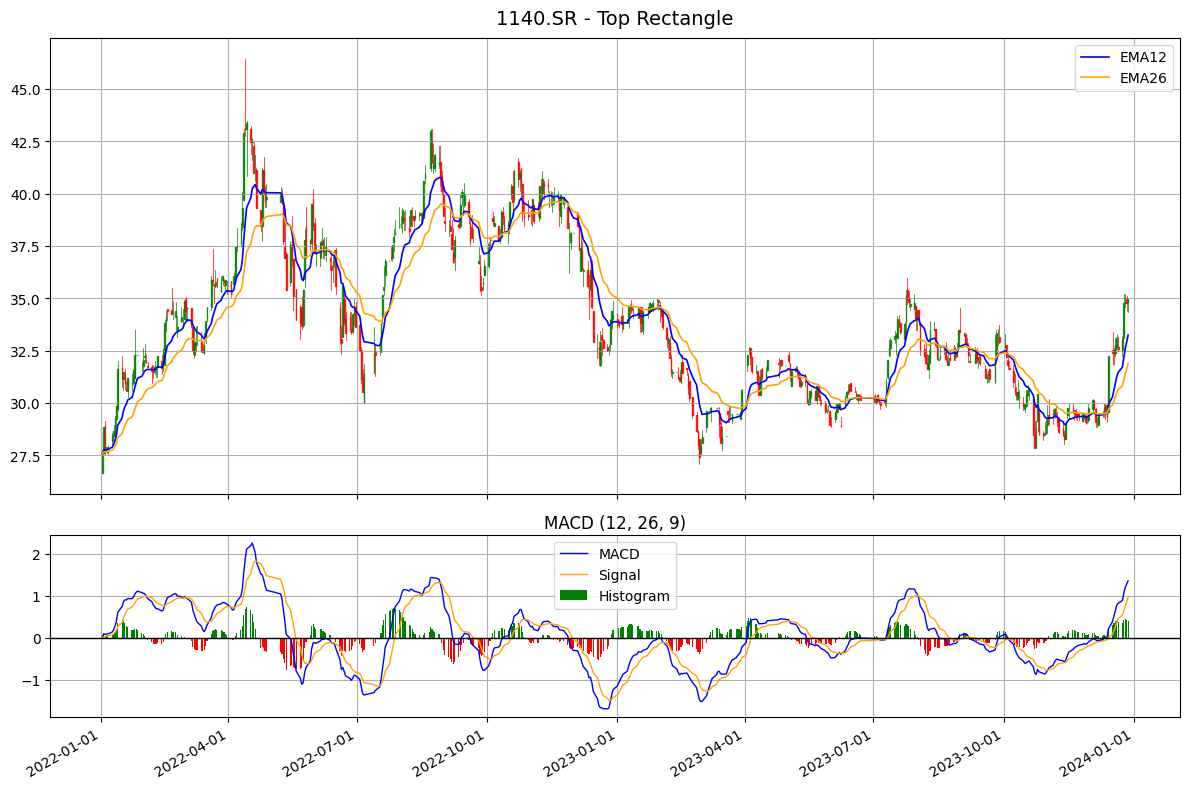

[*********************100%***********************]  1 of 1 completed


Plotting: Head and Shoulders Top | Ticker: 2050.SR


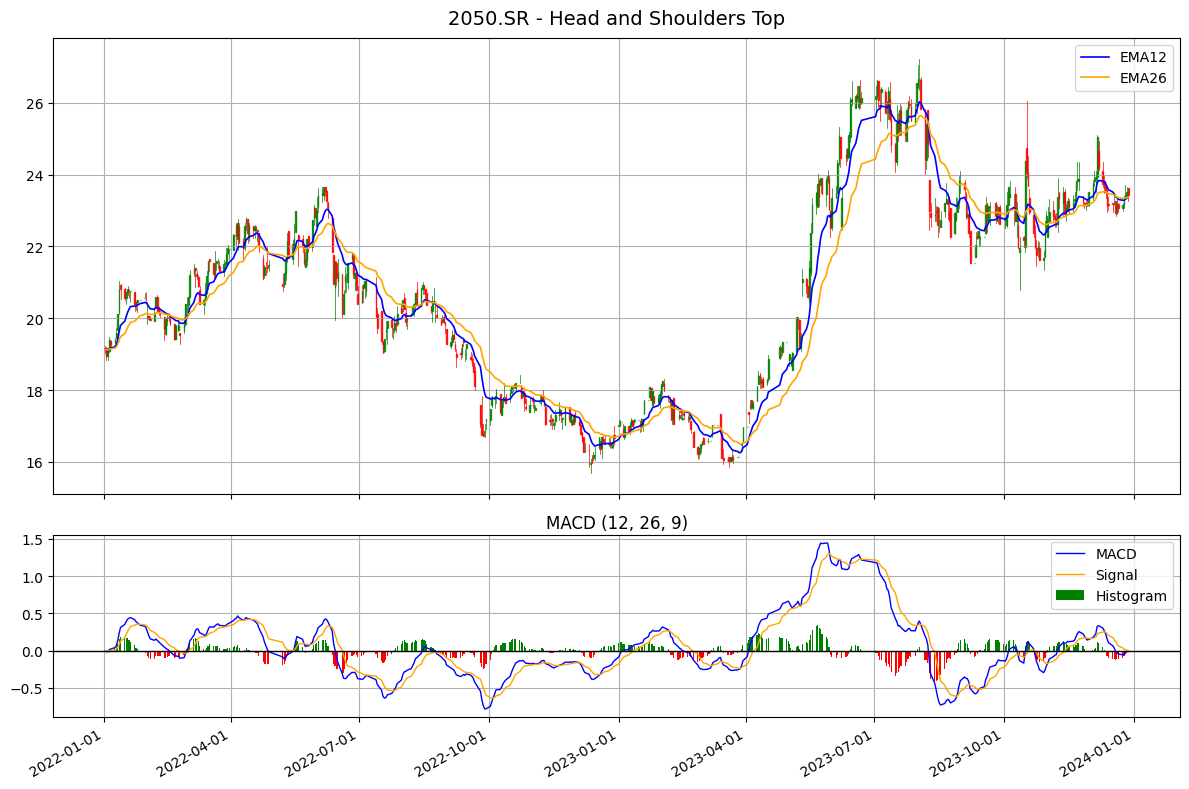

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# We use the 'original_flavor' candlestick function from mplfinance
from mplfinance.original_flavor import candlestick_ohlc

###############################################################################
# STEP 1: Define dictionaries for your patterns and their corresponding tickers
###############################################################################

bullish_stocks = {
    "Flag (Bullish)": "2222.SR",           # Saudi Aramco
    "Pennant (Bullish)": "1120.SR",        # Al Rajhi Bank
    "Cup with Handle": "2010.SR",          # SABIC
    "Ascending Triangle": "7010.SR",       # Saudi Telecom Company (STC)
    "Symmetrical Triangle (Bullish)": "1180.SR", # Saudi National Bank (SNB)
    "Measured Move Up": "4250.SR",         # Jabal Omar Development Company
    "Ascending Scallop": "1150.SR",        # Alinma Bank
    "3 Rising Valleys": "1211.SR"          # Ma'aden (Saudi Arabian Mining Company)
}

bearish_stocks = {
    "Flag (Bearish)": "2350.SR",                 # Saudi Kayan Petrochemical Company
    "Pennant (Bearish)": "4300.SR",              # Dar Al Arkan Real Estate
    "Inverted Cup with Handle": "8120.SR",       # Gulf Union Insurance
    "Descending Triangle": "7020.SR",            # Etihad Etisalat (Mobily)
    "Symmetrical Triangle (Bearish)": "4220.SR", # Emaar The Economic City
    "Measured Move Down": "2040.SR",             # Saudi Ceramic Company
    "Descending Scallop": "4030.SR",             # Bahri
    "3 Descending Peaks": "2300.SR"              # Saudi Paper Manufacturing Company
}

reversal_stocks = {
    "Double Bottoms": "6004.SR",           # Saudi Airlines Catering Company
    "Diamond Bottoms": "1810.SR",          # Al-Tayyar Travel Group (Seera)
    "Top Rectangle": "1140.SR",            # Bank Albilad
    "Head and Shoulders Top": "2050.SR"    # Savola Group
}

###############################################################################
# STEP 2: Create a function to plot candlestick + EMA + MACD
###############################################################################

def plot_price_and_macd(ticker, start_date, end_date, pattern_name):
    """
    Downloads historical data for the given TADAWUL ticker, computes MACD,
    and plots:
      1) Candlestick chart with 12-day and 26-day EMA (upper subplot).
      2) MACD, signal line, and histogram (lower subplot).
    pattern_name: String describing the pattern (used in chart title).
    """
    # Download daily data from Yahoo Finance
    df = yf.download(ticker, start=start_date, end=end_date)

    if df.empty:
        print(f"No data found for {ticker} in the given date range.")
        return

    # Calculate 12-day and 26-day EMAs for MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

    # MACD and Signal line
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    # MACD Histogram
    df['Hist'] = df['MACD'] - df['Signal']

    # Prepare a new DataFrame for candlestick_ohlc
    # candlestick_ohlc expects a list of [date, open, high, low, close]
    # with 'date' as a float in matplotlib date format
    df_ohlc = df[['Open', 'High', 'Low', 'Close']].copy()
    df_ohlc['Date'] = df_ohlc.index.map(mdates.date2num)
    ohlc = df_ohlc[['Date', 'Open', 'High', 'Low', 'Close']].values

    # Create subplots: top for price, bottom for MACD
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': [2.5, 1]})

    # --- UPPER SUBPLOT (Candlesticks + EMAs) ---
    ax1.set_title(f"{ticker} - {pattern_name}", fontsize=14, pad=10)

    # Plot candlesticks
    candlestick_ohlc(ax1, ohlc, width=0.5, colorup='g', colordown='r', alpha=0.8)

    # Plot EMAs
    ax1.plot(df.index, df['EMA12'], label='EMA12', color='blue', linewidth=1.2)
    ax1.plot(df.index, df['EMA26'], label='EMA26', color='orange', linewidth=1.2)

    ax1.legend()
    ax1.grid(True)

    # Format x-axis as dates
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')

    # --- LOWER SUBPLOT (MACD) ---
    ax2.set_title("MACD (12, 26, 9)", fontsize=12, pad=5)

    # Plot MACD and Signal lines
    ax2.plot(df.index, df['MACD'], label='MACD', color='blue', linewidth=1)
    ax2.plot(df.index, df['Signal'], label='Signal', color='orange', linewidth=1)

    # MACD Histogram (vertical bar plot)
    ax2.bar(
        df.index,
        df['Hist'],
        color=np.where(df['Hist'] >= 0, 'green', 'red'),
        label='Histogram'
    )

    ax2.axhline(y=0, color='black', linewidth=1)
    ax2.legend()
    ax2.grid(True)

    # Align date labels
    plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')

    plt.tight_layout()
    plt.show()

###############################################################################
# STEP 3: Define your date range and loop over each category
###############################################################################

if __name__ == "__main__":
    # Choose a date range (adjust as needed)
    start_date = "2022-01-01"
    end_date = "2023-12-31"

    print("==== BULLISH PATTERNS ====")
    for pattern_name, ticker in bullish_stocks.items():
        print(f"\nPlotting: {pattern_name} | Ticker: {ticker}")
        plot_price_and_macd(ticker, start_date, end_date, pattern_name)

    print("==== BEARISH PATTERNS ====")
    for pattern_name, ticker in bearish_stocks.items():
        print(f"\nPlotting: {pattern_name} | Ticker: {ticker}")
        plot_price_and_macd(ticker, start_date, end_date, pattern_name)

    print("==== REVERSAL PATTERNS ====")
    for pattern_name, ticker in reversal_stocks.items():
        print(f"\nPlotting: {pattern_name} | Ticker: {ticker}")
        plot_price_and_macd(ticker, start_date, end_date, pattern_name)


[*********************100%***********************]  1 of 1 completed

Available patterns:
1. flag_bullish - Bullish Flag - Saudi Aramco (2222.SR)
2. pennant_bullish - Bullish Pennant - Al Rajhi Bank (1120.SR)
3. cup_with_handle - Cup with Handle - SABIC (2010.SR)
4. ascending_triangle - Ascending Triangle - STC (7010.SR)
5. symmetrical_triangle_bullish - Symmetrical Triangle (Bullish) - Saudi National Bank (1180.SR)
6. measured_move_up - Measured Move Up - Jabal Omar (4250.SR)
7. ascending_scallop - Ascending Scallop - Alinma Bank (1150.SR)
8. three_rising_valleys - 3 Rising Valleys - Ma'aden (1211.SR)
9. flag_bearish - Bearish Flag - Saudi Kayan (2350.SR)
10. pennant_bearish - Bearish Pennant - Dar Al Arkan (4300.SR)
11. inverted_cup_handle - Inverted Cup with Handle - Gulf Union Insurance (8120.SR)
12. descending_triangle - Descending Triangle - Mobily (7020.SR)
13. symmetrical_triangle_bearish - Symmetrical Triangle (Bearish) - Emaar EC (4220.SR)
14. measured_move_down - Measured Move Down - Saudi Ceramic (2040.SR)
15. descending_scallop - Descending 

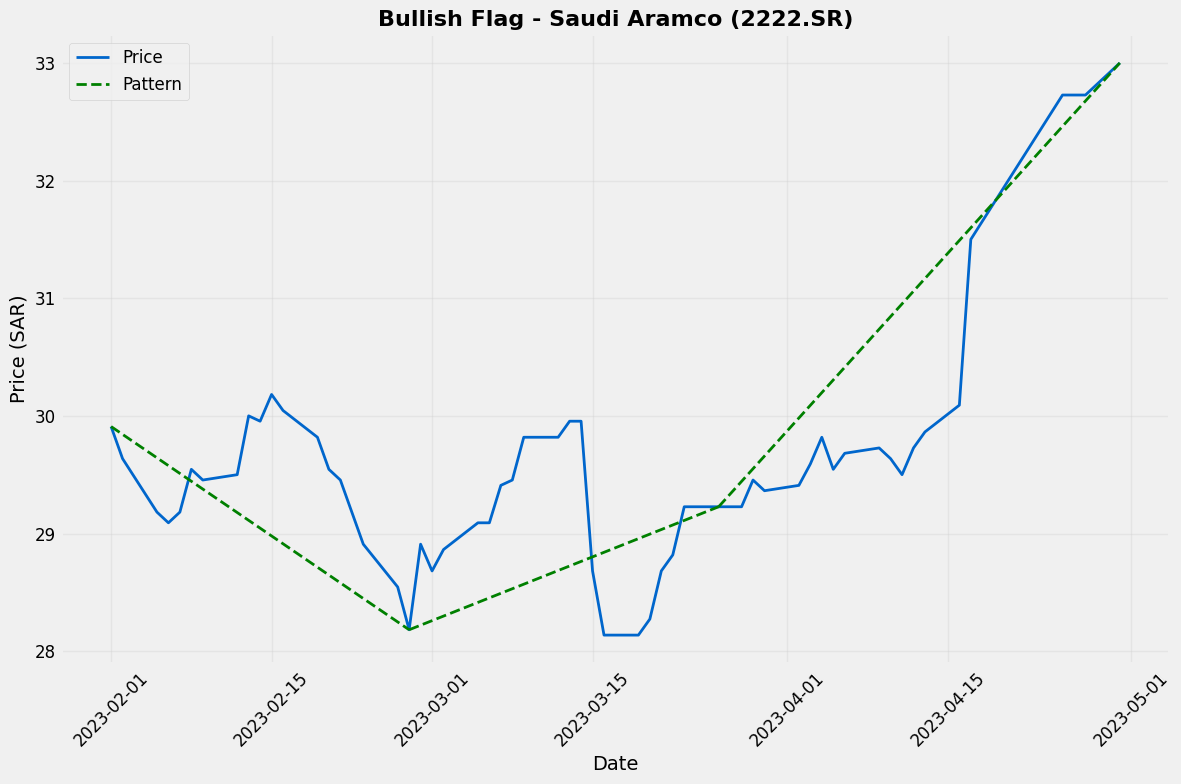

[*********************100%***********************]  1 of 1 completed


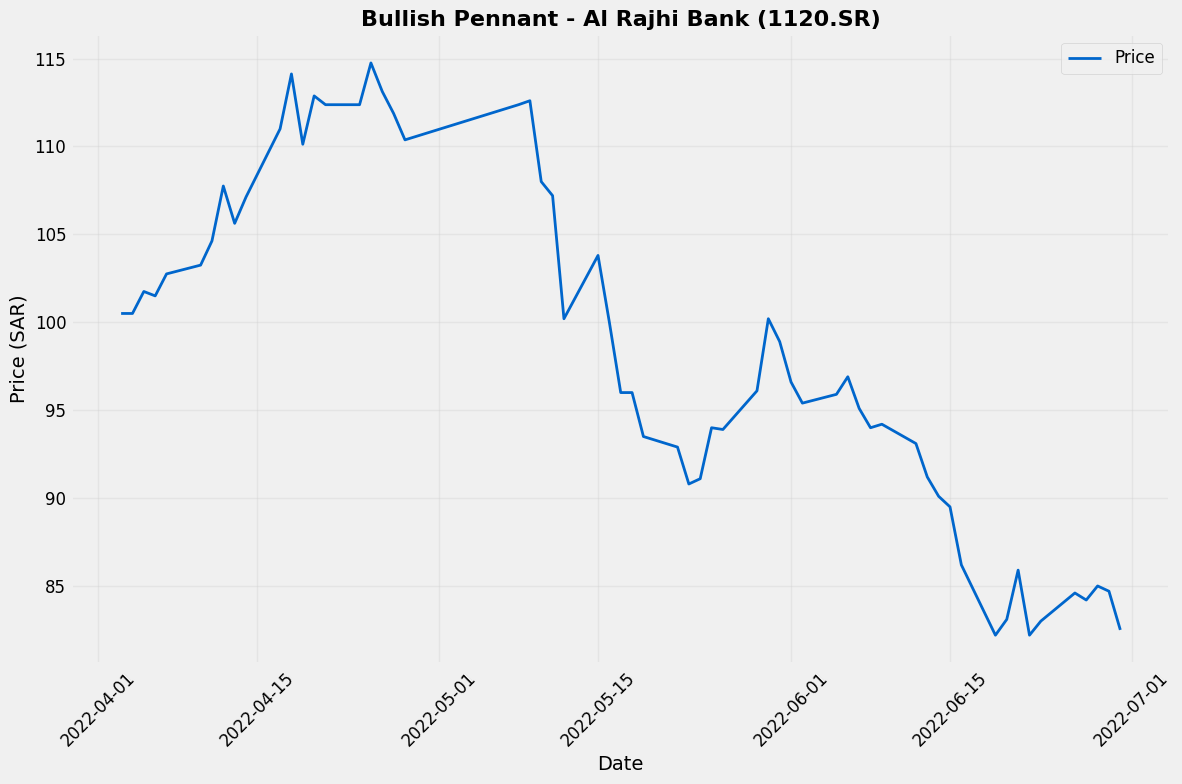

[*********************100%***********************]  1 of 1 completed


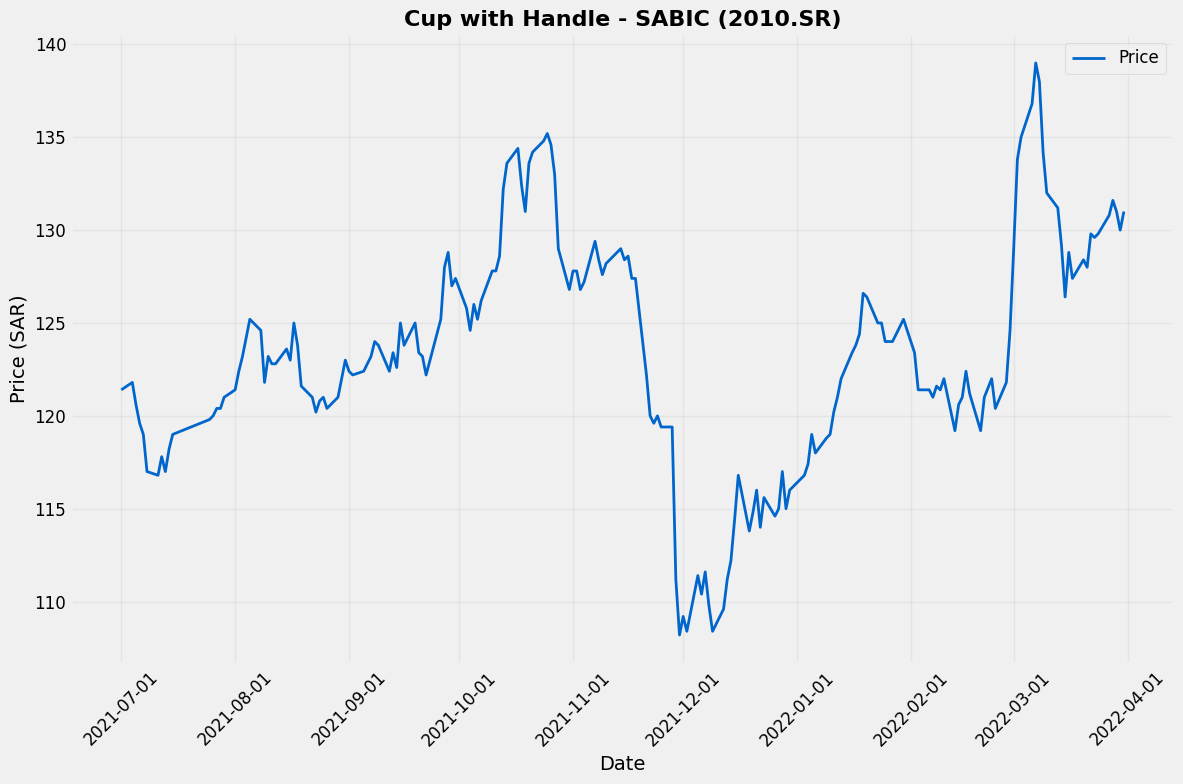

[*********************100%***********************]  1 of 1 completed


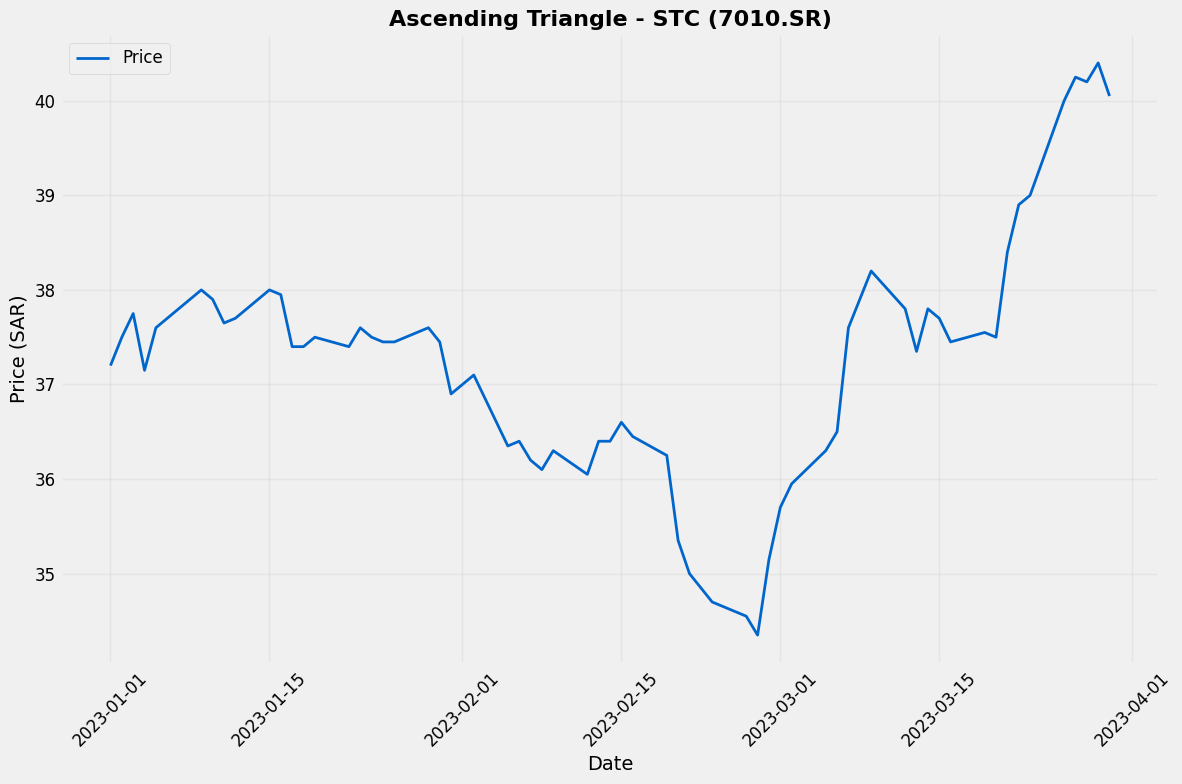

[*********************100%***********************]  1 of 1 completed


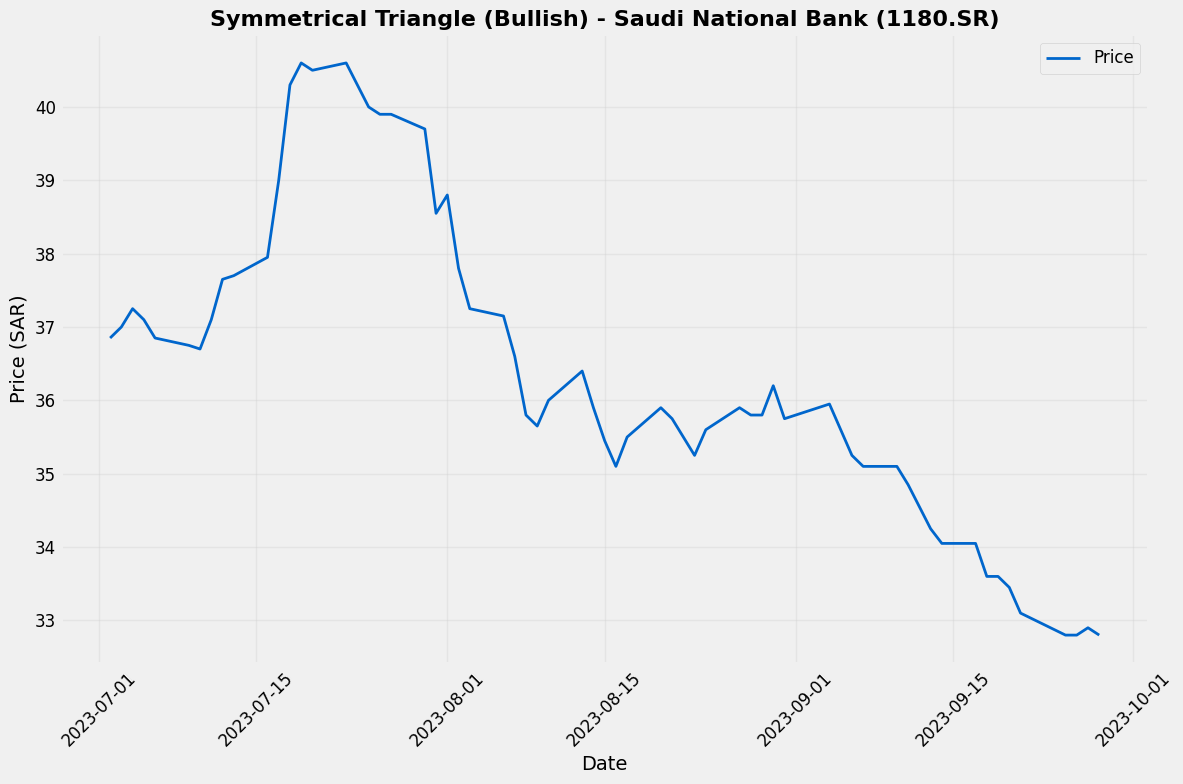

[*********************100%***********************]  1 of 1 completed


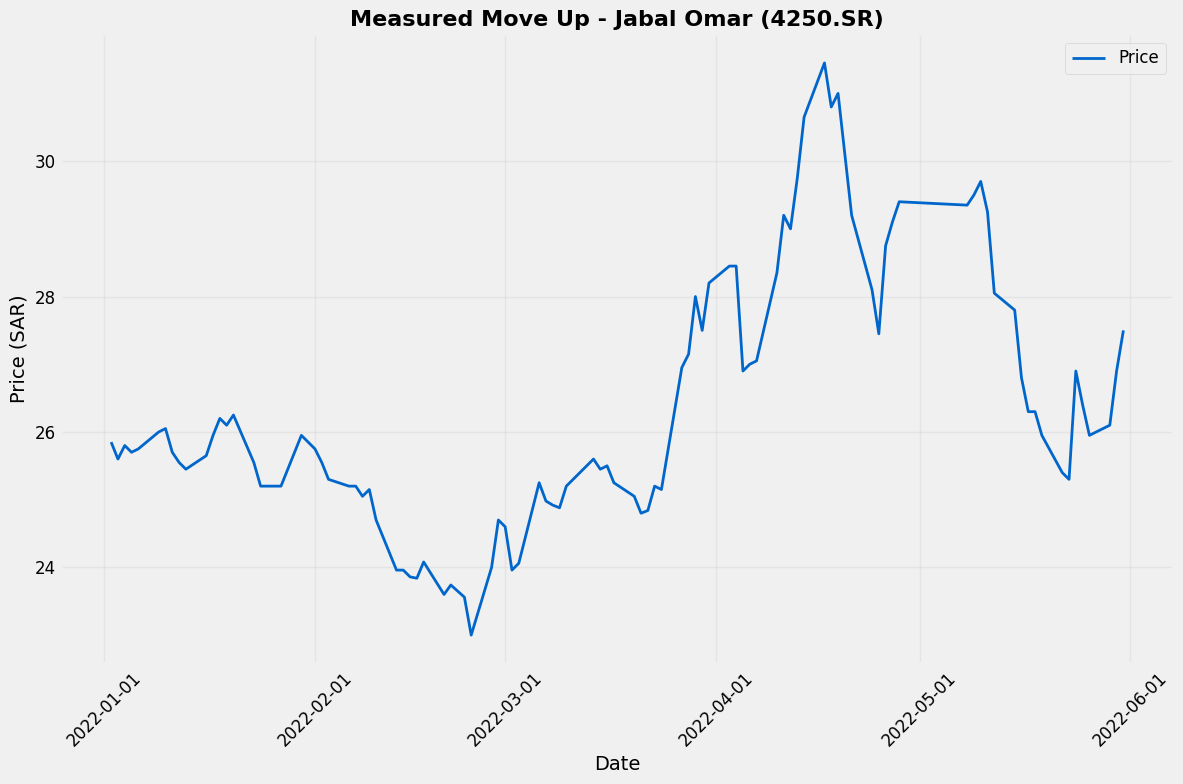

[*********************100%***********************]  1 of 1 completed


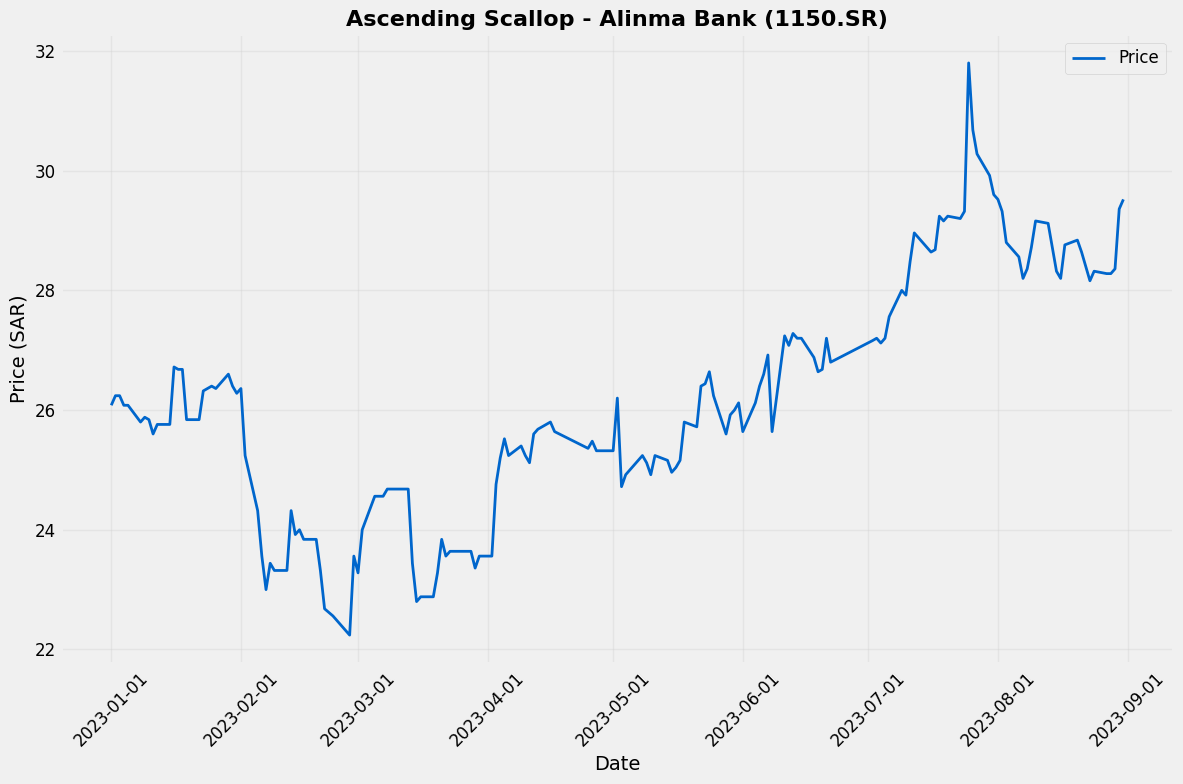

[*********************100%***********************]  1 of 1 completed


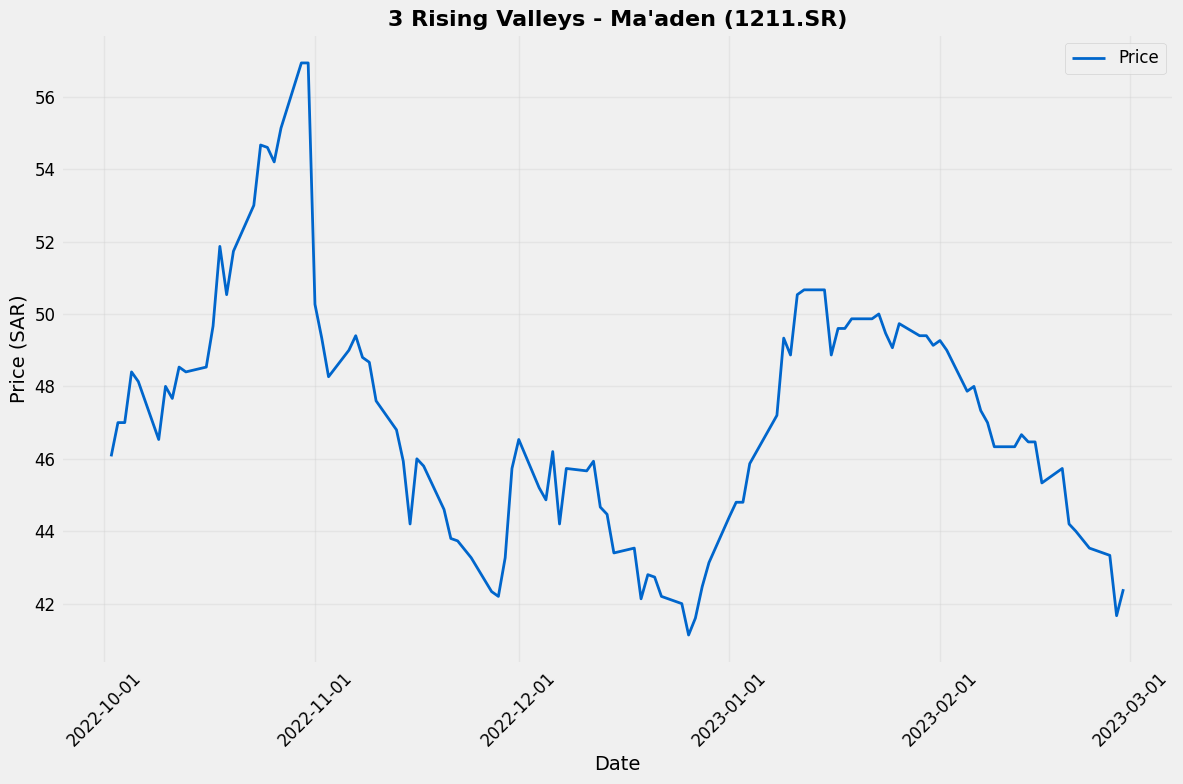

[*********************100%***********************]  1 of 1 completed


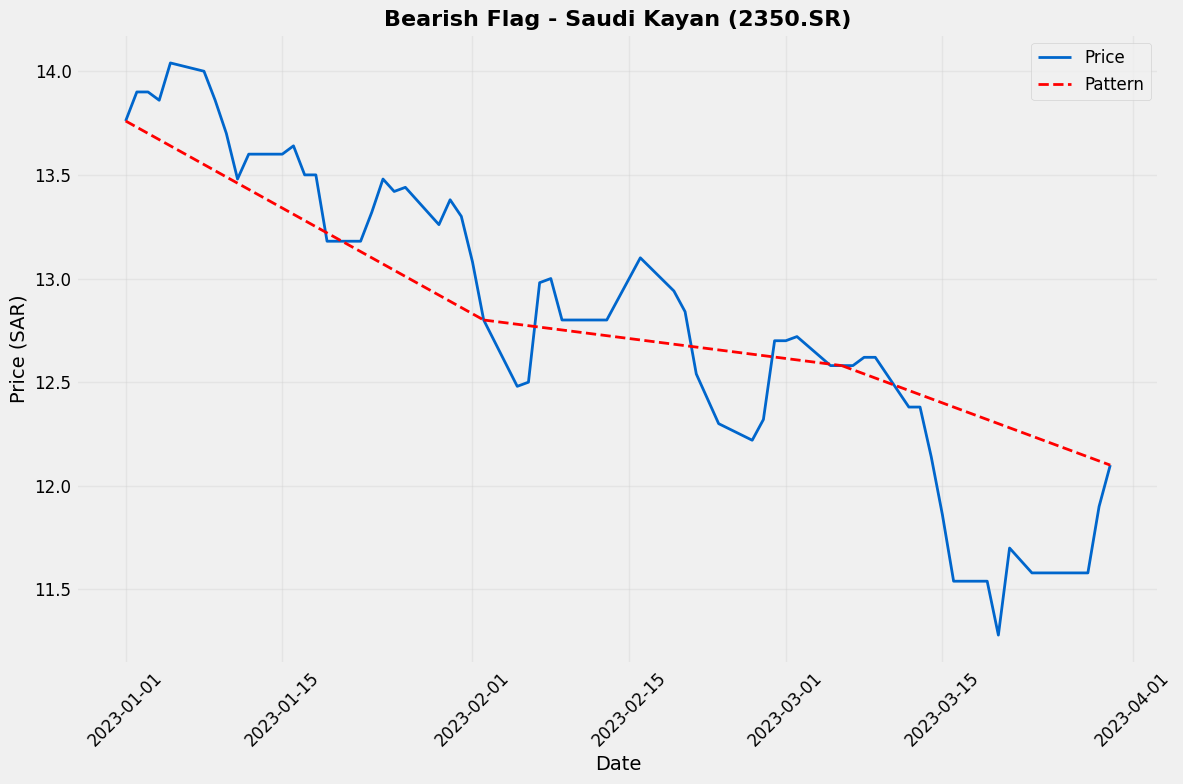

[*********************100%***********************]  1 of 1 completed


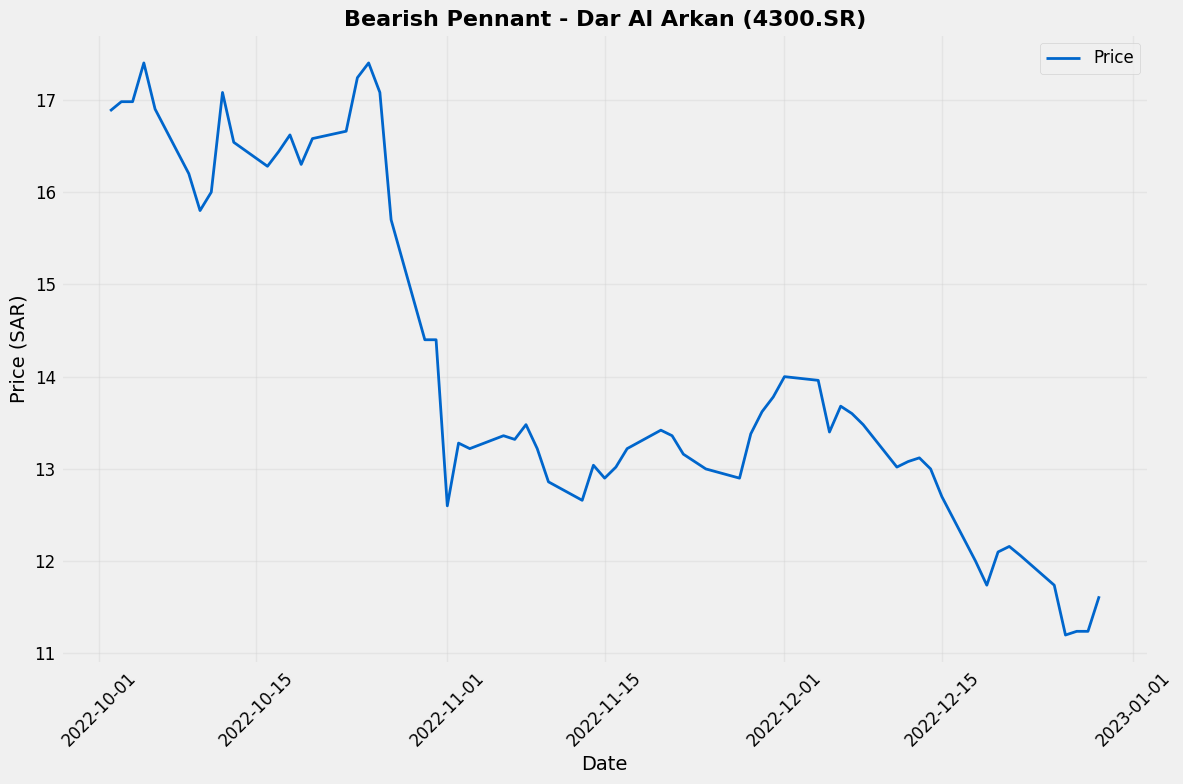

[*********************100%***********************]  1 of 1 completed


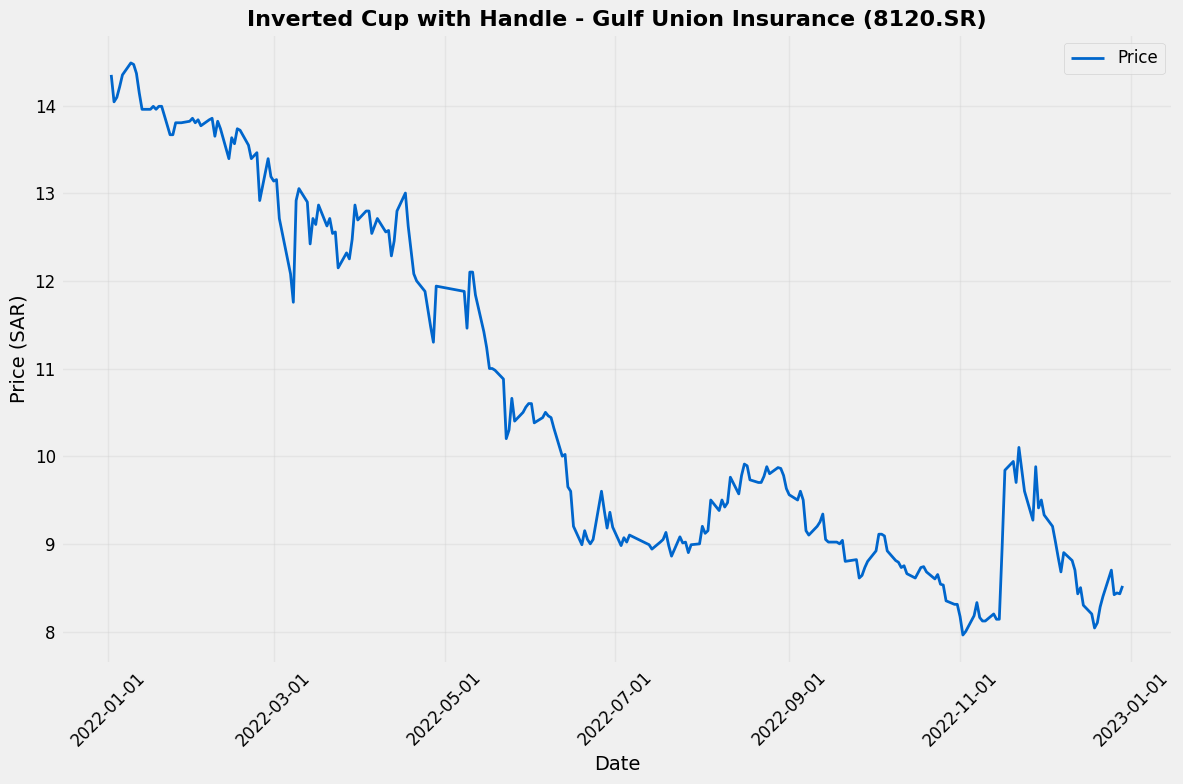

[*********************100%***********************]  1 of 1 completed


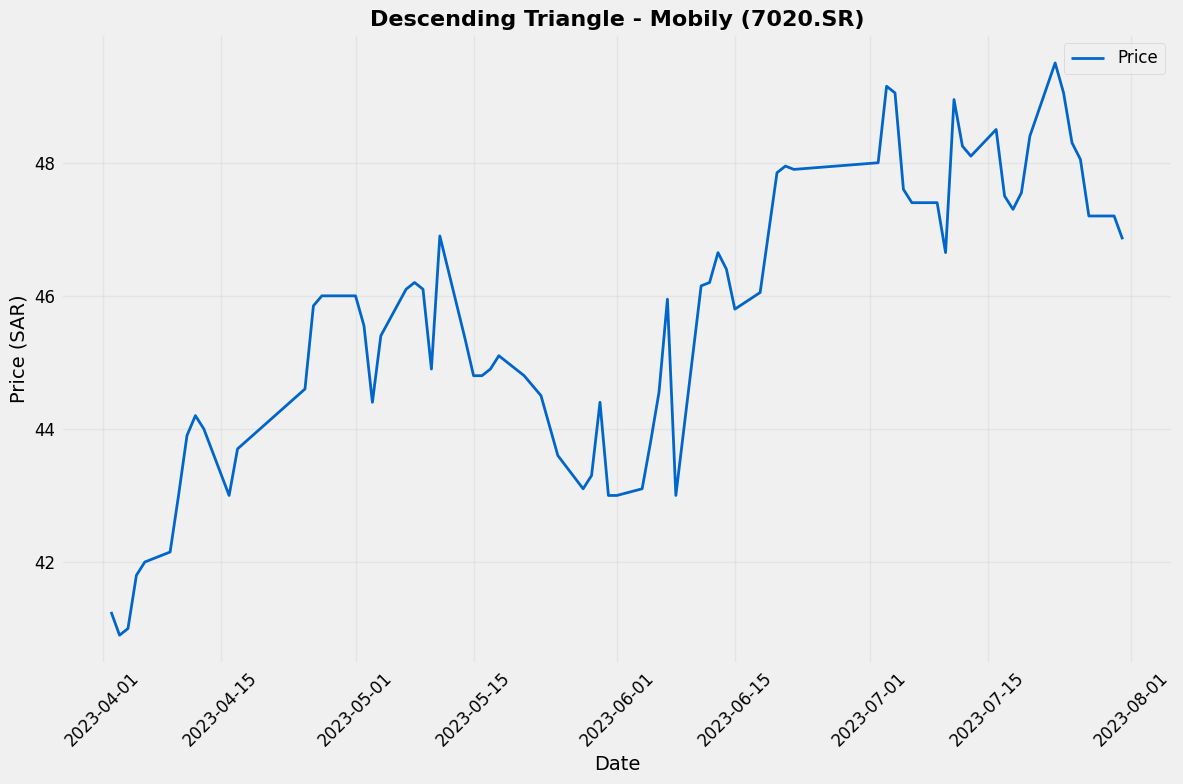

[*********************100%***********************]  1 of 1 completed


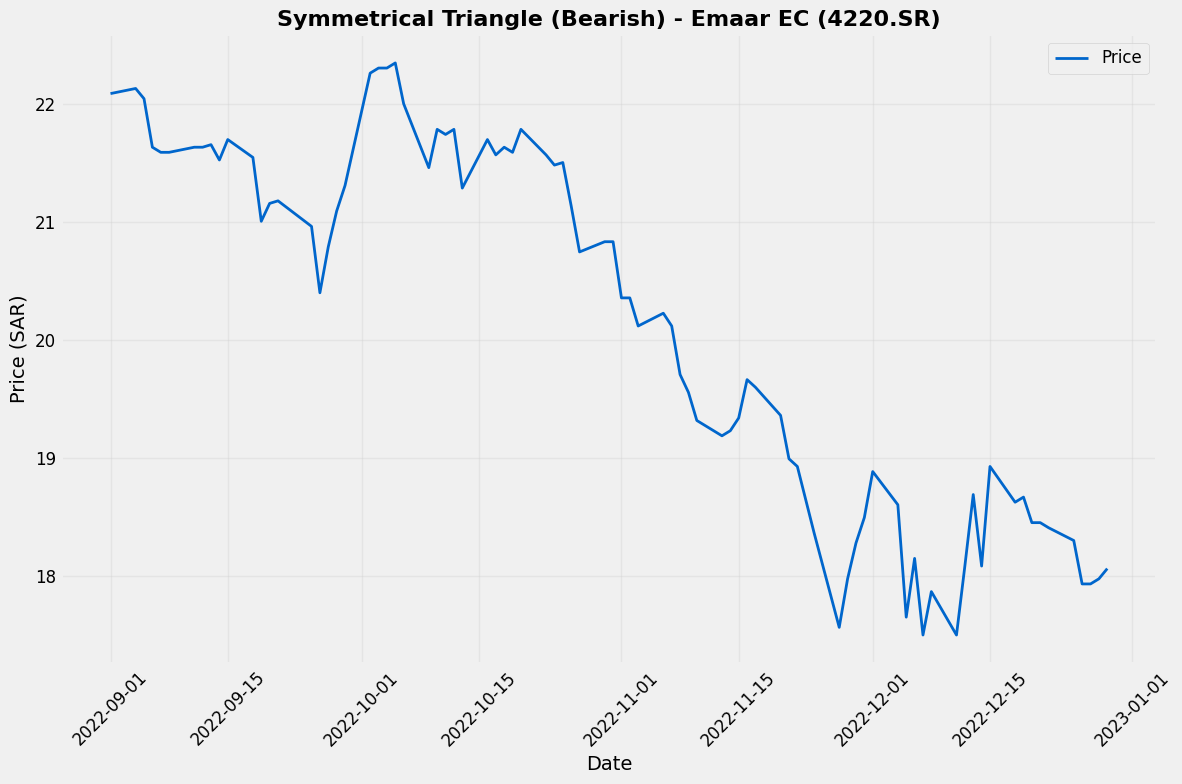

[*********************100%***********************]  1 of 1 completed


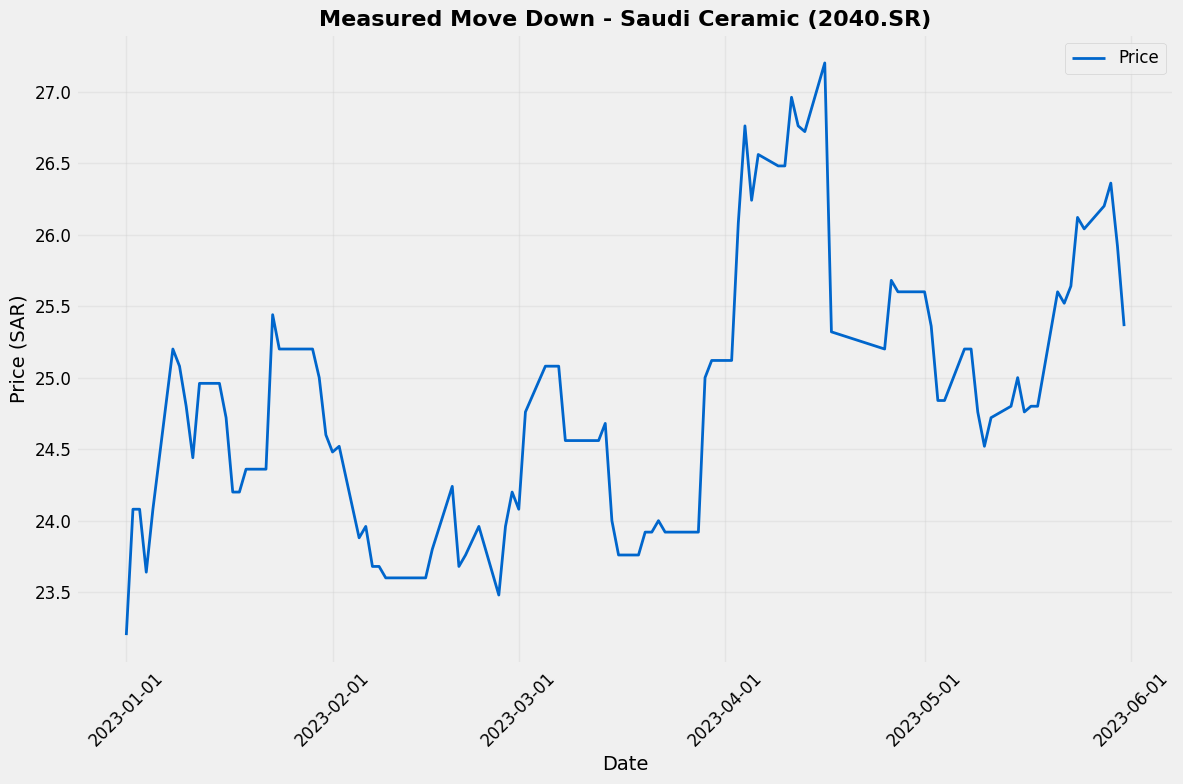

[*********************100%***********************]  1 of 1 completed


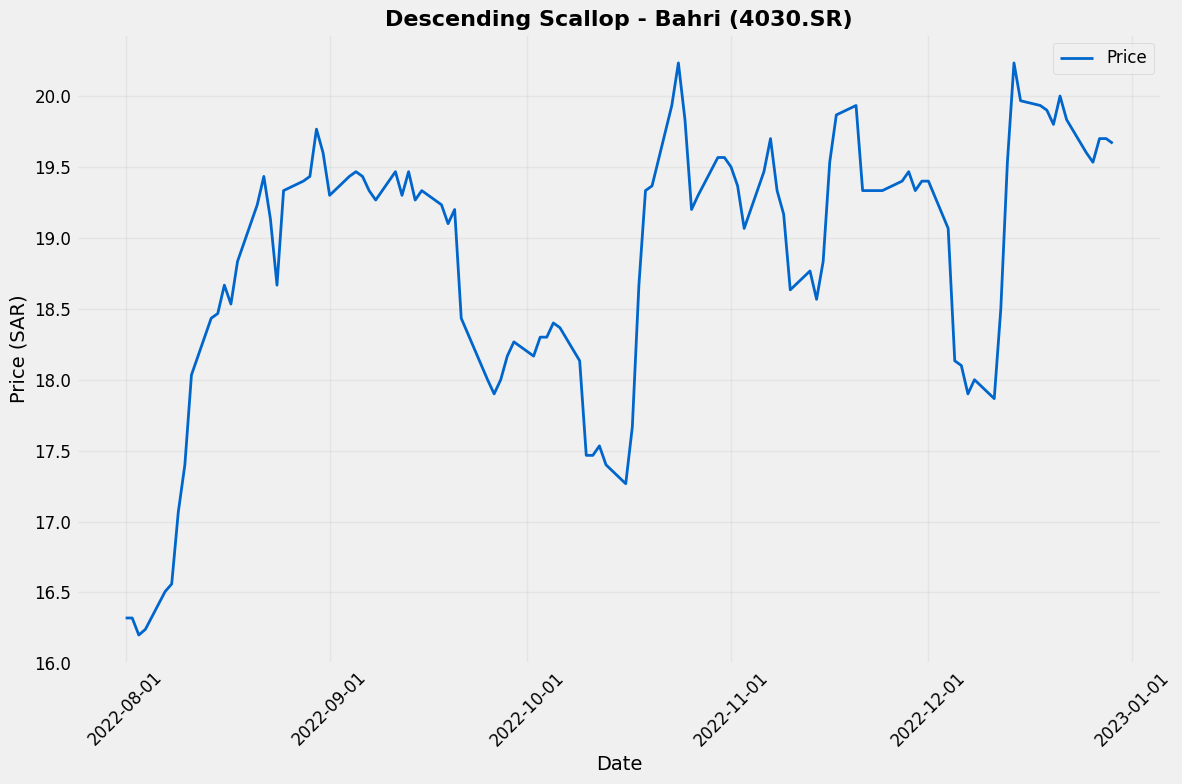

[*********************100%***********************]  1 of 1 completed


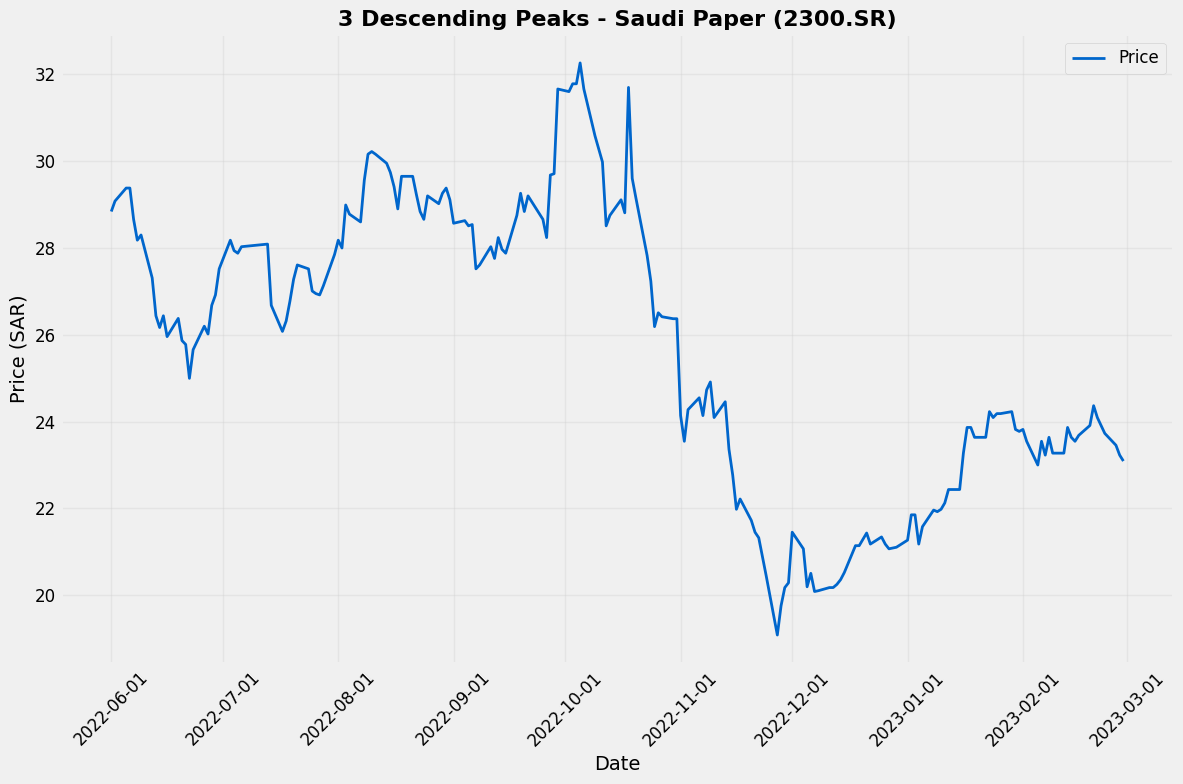

[*********************100%***********************]  1 of 1 completed


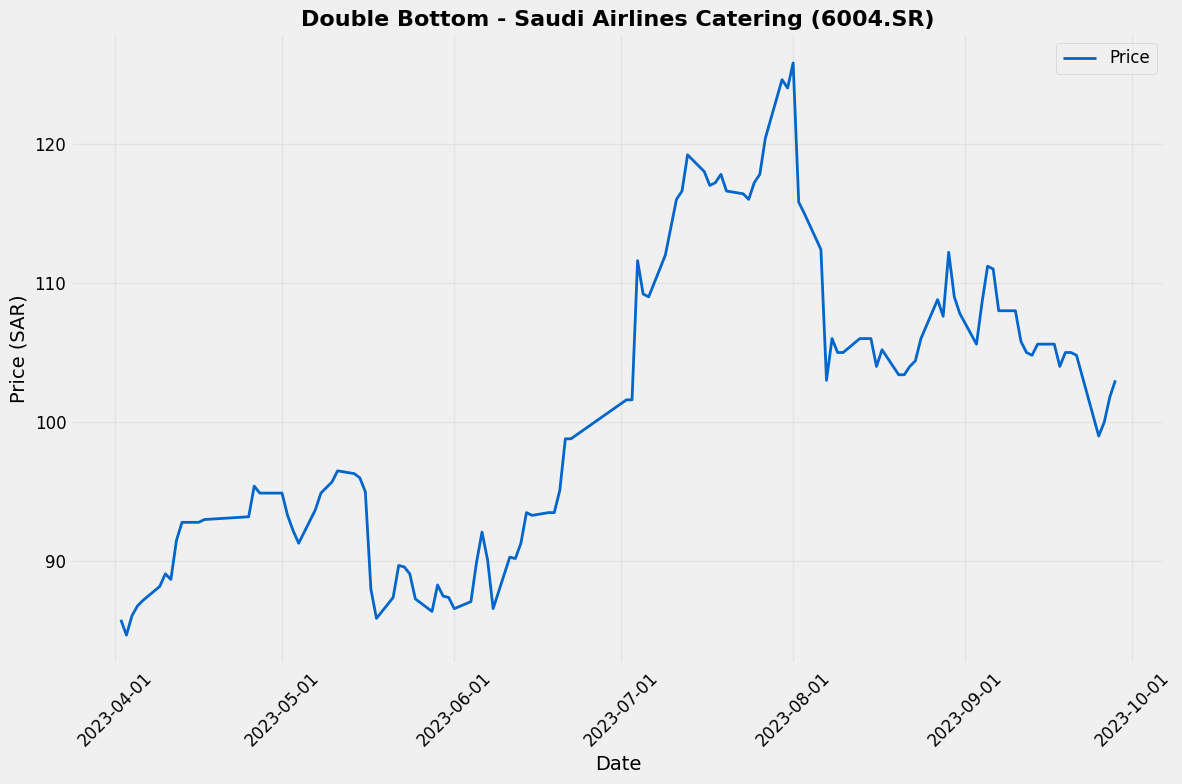

[*********************100%***********************]  1 of 1 completed


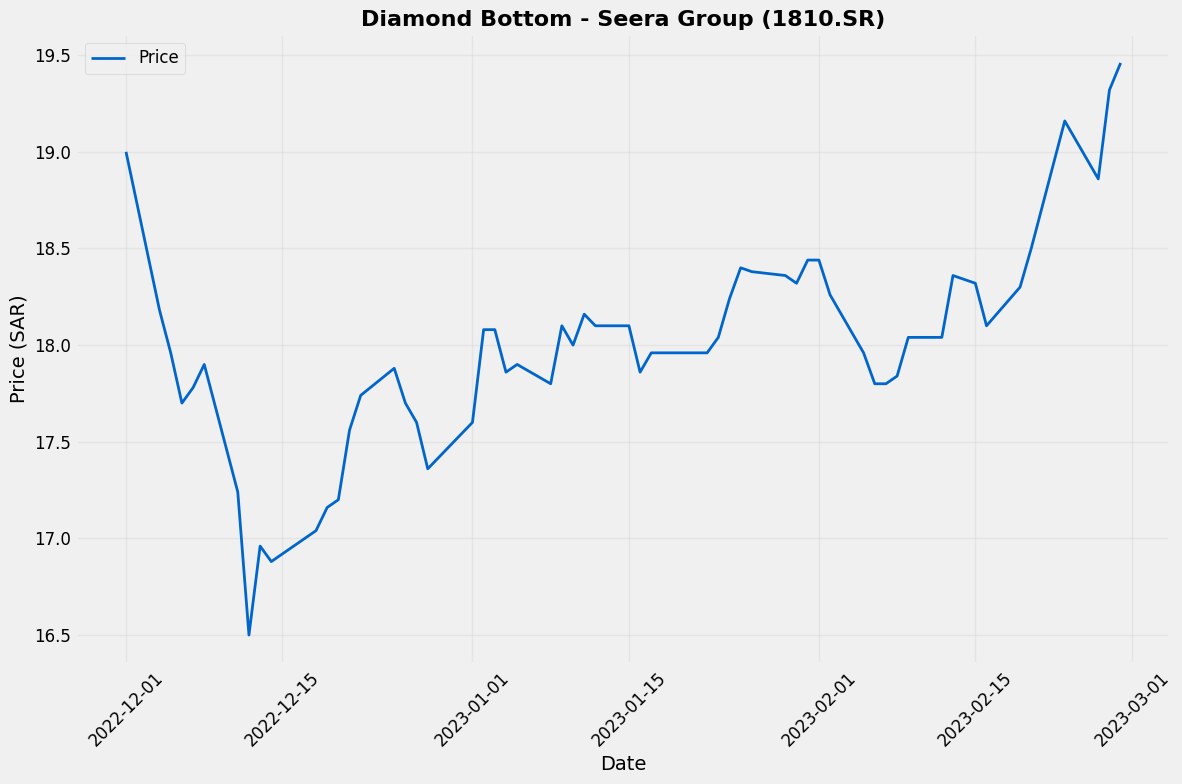

[*********************100%***********************]  1 of 1 completed


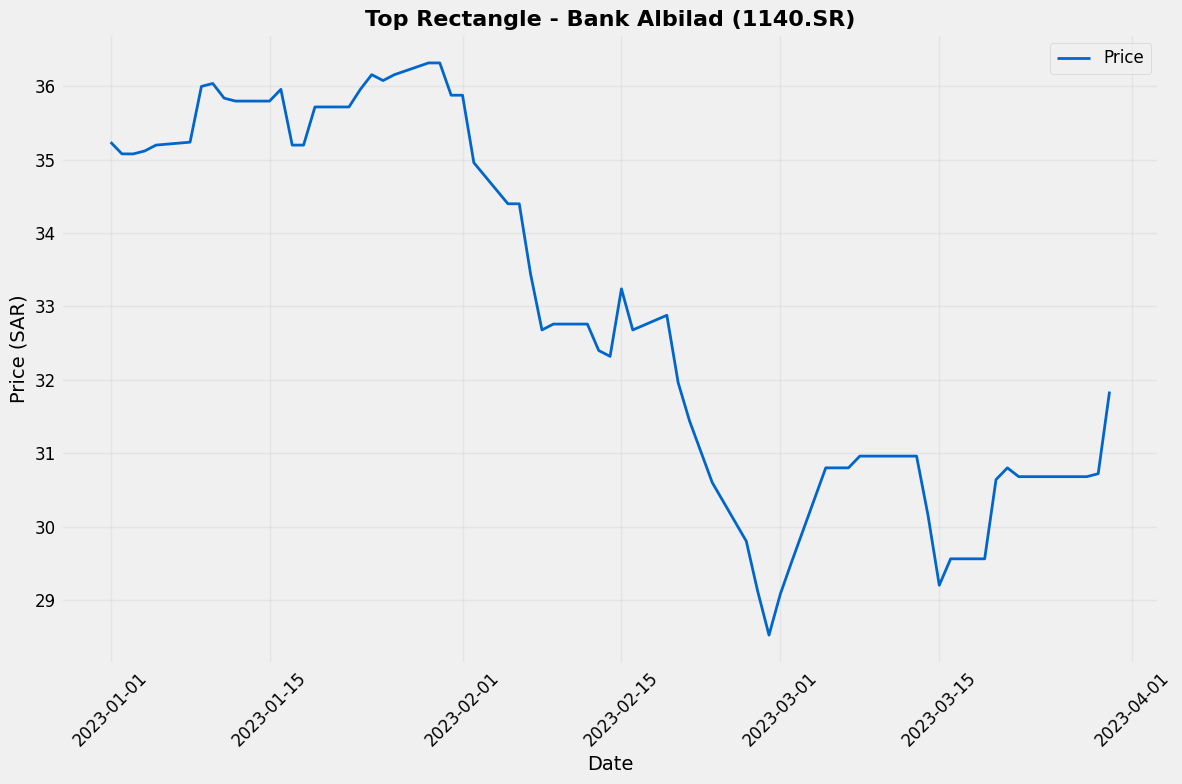

[*********************100%***********************]  1 of 1 completed


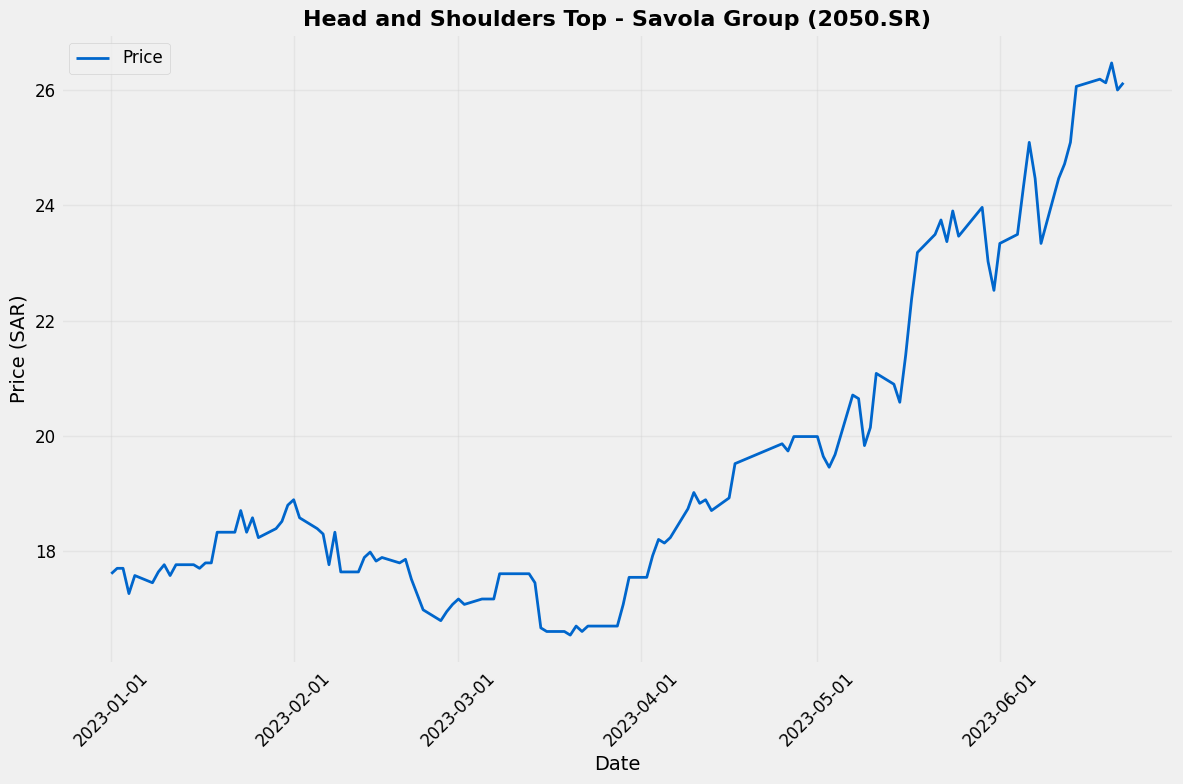

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.patches as patches
import matplotlib.lines as lines

# Set style parameters
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Function to fetch stock data (using .SR suffix for Saudi stocks on Yahoo Finance)
def get_stock_data(ticker, start_date, end_date):
    try:
        # Try using .SR suffix for Saudi stocks
        if not ticker.endswith('.SR'):
            saudi_ticker = f"{ticker}.SR"
        else:
            saudi_ticker = ticker

        # Download data with auto_adjust disabled
        data = yf.download(saudi_ticker, start=start_date, end=end_date, auto_adjust=False)

        # If no data, try without the suffix
        if data.empty:
            data = yf.download(ticker.replace('.SR', ''), start=start_date, end=end_date, auto_adjust=False)

        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return pd.DataFrame()

# Class to draw various technical patterns
class ChartPatternVisualizer:
    def __init__(self):
        self.patterns = {
            # ----------------- Bullish Patterns -----------------
            'flag_bullish': {
                'title': 'Bullish Flag - Saudi Aramco (2222.SR)',
                'ticker': '2222.SR',
                'start': '2023-02-01',
                'end': '2023-05-01'
            },
            'pennant_bullish': {
                'title': 'Bullish Pennant - Al Rajhi Bank (1120.SR)',
                'ticker': '1120.SR',
                'start': '2022-04-01',
                'end': '2022-07-01'
            },
            'cup_with_handle': {
                'title': 'Cup with Handle - SABIC (2010.SR)',
                'ticker': '2010.SR',
                'start': '2021-07-01',
                'end': '2022-04-01'
            },
            'ascending_triangle': {
                'title': 'Ascending Triangle - STC (7010.SR)',
                'ticker': '7010.SR',
                'start': '2023-01-01',
                'end': '2023-04-01'
            },
            'symmetrical_triangle_bullish': {
                'title': 'Symmetrical Triangle (Bullish) - Saudi National Bank (1180.SR)',
                'ticker': '1180.SR',
                'start': '2023-07-01',
                'end': '2023-10-01'
            },
            'measured_move_up': {
                'title': 'Measured Move Up - Jabal Omar (4250.SR)',
                'ticker': '4250.SR',
                'start': '2022-01-01',
                'end': '2022-06-01'
            },
            'ascending_scallop': {
                'title': 'Ascending Scallop - Alinma Bank (1150.SR)',
                'ticker': '1150.SR',
                'start': '2023-01-01',
                'end': '2023-09-01'
            },
            'three_rising_valleys': {
                'title': "3 Rising Valleys - Ma'aden (1211.SR)",
                'ticker': '1211.SR',
                'start': '2022-10-01',
                'end': '2023-03-01'
            },

            # ----------------- Bearish Patterns -----------------
            'flag_bearish': {
                'title': 'Bearish Flag - Saudi Kayan (2350.SR)',
                'ticker': '2350.SR',
                'start': '2023-01-01',
                'end': '2023-04-01'
            },
            'pennant_bearish': {
                'title': 'Bearish Pennant - Dar Al Arkan (4300.SR)',
                'ticker': '4300.SR',
                'start': '2022-10-01',
                'end': '2022-12-31'
            },
            'inverted_cup_handle': {
                'title': 'Inverted Cup with Handle - Gulf Union Insurance (8120.SR)',
                'ticker': '8120.SR',
                'start': '2022-01-01',
                'end': '2022-12-31'
            },
            'descending_triangle': {
                'title': 'Descending Triangle - Mobily (7020.SR)',
                'ticker': '7020.SR',
                'start': '2023-04-01',
                'end': '2023-08-01'
            },
            'symmetrical_triangle_bearish': {
                'title': 'Symmetrical Triangle (Bearish) - Emaar EC (4220.SR)',
                'ticker': '4220.SR',
                'start': '2022-09-01',
                'end': '2022-12-31'
            },
            'measured_move_down': {
                'title': 'Measured Move Down - Saudi Ceramic (2040.SR)',
                'ticker': '2040.SR',
                'start': '2023-01-01',
                'end': '2023-06-01'
            },
            'descending_scallop': {
                'title': 'Descending Scallop - Bahri (4030.SR)',
                'ticker': '4030.SR',
                'start': '2022-08-01',
                'end': '2022-12-31'
            },
            'three_descending_peaks': {
                'title': '3 Descending Peaks - Saudi Paper (2300.SR)',
                'ticker': '2300.SR',
                'start': '2022-06-01',
                'end': '2023-03-01'
            },

            # ----------------- Reversal Patterns -----------------
            'double_bottom': {
                'title': 'Double Bottom - Saudi Airlines Catering (6004.SR)',
                'ticker': '6004.SR',
                'start': '2023-04-01',
                'end': '2023-09-30'
            },
            'diamond_bottom': {
                'title': 'Diamond Bottom - Seera Group (1810.SR)',
                'ticker': '1810.SR',
                'start': '2022-12-01',
                'end': '2023-03-01'
            },
            'top_rectangle': {
                'title': 'Top Rectangle - Bank Albilad (1140.SR)',
                'ticker': '1140.SR',
                'start': '2023-01-01',
                'end': '2023-04-01'
            },
            'head_shoulders_top': {
                'title': 'Head and Shoulders Top - Savola Group (2050.SR)',
                'ticker': '2050.SR',
                'start': '2023-01-01',
                'end': '2023-07-01'
            }
        }

    def visualize_all_patterns(self):
        for pattern_key, pattern_info in self.patterns.items():
            self.visualize_pattern(pattern_key)
            plt.close()  # Close each plot after showing to avoid overlap

    def visualize_pattern(self, pattern_key):
        if pattern_key not in self.patterns:
            print(f"Pattern {pattern_key} not found")
            return

        pattern_info = self.patterns[pattern_key]
        ticker = pattern_info['ticker']
        start_date = pattern_info['start']
        end_date = pattern_info['end']
        title = pattern_info['title']

        # Fetch data
        data = get_stock_data(ticker, start_date, end_date)
        if data.empty:
            print(f"No data available for {ticker} from {start_date} to {end_date}")
            return

        # Create the plot
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(data.index, data['Close'], color='#0066cc', linewidth=2)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.xticks(rotation=45)
        ax.grid(True, alpha=0.3)
        plt.title(title, fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price (SAR)', fontsize=14)

        # Draw pattern annotation (placeholder logic)
        self._draw_pattern_annotation(ax, pattern_key, data)
        ax.legend(['Price', 'Pattern'], loc='best')
        plt.tight_layout()
        plt.show()

    def _draw_pattern_annotation(self, ax, pattern_key, data):
        # Convert index to list and "Close" prices to a 1-D numeric array
        dates = list(data.index)
        # Use .values.flatten() to ensure a 1-d array
        prices = list(pd.to_numeric(data['Close'].values.flatten(), errors='coerce'))
        n = len(dates)
        if n < 10:
            return

        if 'flag' in pattern_key:
            is_bullish = 'bullish' in pattern_key
            diff_vals = np.diff(prices[:n//2])
            if is_bullish:
                max_increase_idx = np.argmax(diff_vals)
                flag_start_idx = max_increase_idx
                flag_end_idx = min(n-1, flag_start_idx + n//3)
            else:
                max_decrease_idx = np.argmin(diff_vals)
                flag_start_idx = max_decrease_idx
                flag_end_idx = min(n-1, flag_start_idx + n//3)

            pole_x = [dates[0], dates[flag_start_idx]]
            pole_y = [prices[0], prices[flag_start_idx]]
            ax.plot(pole_x, pole_y, 'g--' if is_bullish else 'r--', linewidth=2)

            flag_x = [dates[flag_start_idx], dates[flag_end_idx]]
            flag_y = [prices[flag_start_idx], prices[flag_end_idx]]
            ax.plot(flag_x, flag_y, 'g--' if is_bullish else 'r--', linewidth=2)

            breakout_x = [dates[flag_end_idx], dates[-1]]
            breakout_y = [prices[flag_end_idx], prices[-1]]
            ax.plot(breakout_x, breakout_y, 'g--' if is_bullish else 'r--', linewidth=2)

        # Additional pattern annotation logic can be added here as needed.

# ------------------- Usage -------------------
print("Available patterns:")
visualizer = ChartPatternVisualizer()
for i, pattern_key in enumerate(visualizer.patterns.keys()):
    print(f"{i+1}. {pattern_key} - {visualizer.patterns[pattern_key]['title']}")

# Visualize all patterns (charts will display one by one)
visualizer.visualize_all_patterns()
